### 라이브러리 설치

- 참고: ```!```는 주피터 노트에서 터미널 명령어를 실행할 때 사용하는 접두어입니다
```bash
!pip install pandas numpy
```

In [2]:
!pip -q install pandas numpy

In [3]:
import pandas as pd
import numpy as np

print("pandas 버전:", pd.__version__)
print("numpy 버전:", np.__version__)

pandas 버전: 2.3.1
numpy 버전: 2.3.2


In [4]:
# 나의 csv 파일 가져오기[나중에 함수의 인풋을 이것으로 할것이다]

csv_path = "anilife_data_20250908_102635.csv"


# pandas의 csv를 데이터 프레임으로 바꾸는 함수입니다
anilife_data = pd.read_csv(csv_path)

# 총 데이터 수와 칼럼 이름확인
print(f"총{len(anime_data)}")
print(f"칼럼 목록: {list(anime_data.columns)}")

총4453
칼럼 목록: ['id', 'title_korean', 'title_japanese', 'title_english', 'year', 'quarter', 'genres', 'tags', 'synopsis', 'num_characters', 'main_characters', 'director', 'studio', 'original_work', 'error', 'comprehensive_features']



- 구조만 알고 싶다면 이걸 쓰면 된다 - 시간된다면 자주쓰는건 정리해보도록하겠다
```
anime_data.info()
```

In [5]:
# 데이터 전체 구조 확인 (컬럼, 데이터타입, 결측치 등)
anime_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4453 entries, 0 to 4452
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      4453 non-null   int64  
 1   title_korean            4453 non-null   object 
 2   title_japanese          3991 non-null   object 
 3   title_english           3994 non-null   object 
 4   year                    4429 non-null   float64
 5   quarter                 4429 non-null   object 
 6   genres                  3983 non-null   object 
 7   tags                    3916 non-null   object 
 8   synopsis                4453 non-null   object 
 9   num_characters          4453 non-null   int64  
 10  main_characters         3912 non-null   object 
 11  director                3545 non-null   object 
 12  studio                  3936 non-null   object 
 13  original_work           2513 non-null   object 
 14  error                   0 non-null      

In [6]:
# 맨 앞 3개의 행(애니메이션 데이터) 출력
anime_data.head(3)


,id,title_korean,title_japanese,title_english,year,quarter,genres,tags,synopsis,num_characters,main_characters,director,studio,original_work,error,comprehensive_features
0,110,꿈속의 뮤,ミュークルドリーミー,Mewkledreamy,2020.0,2분기,모험|코미디|판타지|마법 소녀,여성 주인공|어린이|에피소딕|주로 아이 캐스트|테니스|동물|주로 여성 캐스트|귀여운...,"연애와 우정, 마음의 상냥함을 그리는 귀여운 드리밍 스토리(恋や友情、心のやさしさを描...",6,뮤(토요사키 아이세)|페코(쿠보 유리카)|히나타 유메(무라카미 나츠미)|수우(칸모토...,사쿠라이 히로아키,"J.C. 스태프, A.C.G.T., TV 도쿄, ADK 이모션즈, 산리오",NaN,NaN,제목: 꿈속의 뮤 | 제작연도: 2020 | 방영분기: 2분기 | 장르: 모험|코미...
1,102,일하는 세포!!,はたらく細胞!!,Hataraku Saibou!!,2021.0,1분기,액션|코미디|SF,교육|앙상블 캐스트|의학|일|여성 주인공|소년 만화|남성 주인공|에피소딕|고어|인간...,"이것은 당신의 이야기이자, 당신 몸속의 이야기.사람의 세포 수는 약 37조개.세포들...",6,U-1146 핫케큐우(마에노 토모아키)|사이보우 이판(코바야시 유스케)|AE3803...,오구라 히로후미,"데이비드 프로덕션, 매직 캡슐, 애니플렉스, 코단샤, 애니플렉스 미국",시미즈 아카네,NaN,제목: 일하는 세포!! | 제작연도: 2021 | 방영분기: 1분기 | 장르: 액션...
2,103,블라드 러브,ぶらどらぶ,Vlad Love,2021.0,1분기,코미디|초자연,뱀파이어|때림 개그|여성 주인공|풍자|메타|괴상한 코미디|풍자|주로 여성 캐스트|학...,등록된 줄거리가 없습니다.,6,밤바 미츠구(사쿠라 아야네)|트란실바니아 블라드 마이(히다카 리나)|치마츠리 치히로...,니시무라 준지,"드라이브, 프로덕션 I.G, 이치고 애니메이션, 만화 애니메이션",오시이 마모루,NaN,제목: 블라드 러브 | 제작연도: 2021 | 방영분기: 1분기 | 장르: 코미디|...


```info()```는 데이터 요약 정보
```head(3)```는 위에서 3개만 보여줘서 빠르게 내용을 확인할 수 있다

### 종합 특징 텍스트 생성 함수를 만들자!

In [7]:
def create_comprehensive_features(anime_data):
    comprehensive_texts = []

    for _, row in anime_data.iterrows():
        features = []

        title = ""
        if pd.notna(row.get('title_korean')) and row['title_korean'].strip():
            title = row['title_korean']
        elif pd.notna(row.get('title_japanese')) and row['title_japanese'].strip():
            title = row['title_japanese']
        elif pd.notna(row.get('title_english')) and row['title_english'].strip():
            title = row['title_english']
        if title:
            features.append(f"제목: {title}")

        if pd.notna(row.get('year')):
            features.append(f"제작연도: {int(row['year'])}")
        if pd.notna(row.get('quarter')) and row['quarter'].strip():
            features.append(f"방영분기: {row['quarter']}")

        if pd.notna(row.get('genres')) and row['genres'].strip():
            features.append(f"장르: {row['genres']}")
        if pd.notna(row.get('tags')) and row['tags'].strip():
            features.append(f"태그: {row['tags']}")

        if pd.notna(row.get('synopsis')) and row['synopsis'].strip():
            synopsis = row['synopsis'][:300]
            features.append(f"줄거리: {synopsis}")

        if pd.notna(row.get('main_characters')) and row['main_characters'].strip():
            features.append(f"주요캐릭터: {row['main_characters']}")
        if pd.notna(row.get('director')) and row['director'].strip():
            features.append(f"감독: {row['director']}")
        if pd.notna(row.get('studio')) and row['studio'].strip():
            features.append(f"제작사: {row['studio']}")
        if pd.notna(row.get('original_work')) and row['original_work'].strip():
            features.append(f"원작: {row['original_work']}")

        if pd.notna(row.get('num_characters')):
            features.append(f"캐릭터수: {int(row['num_characters'])}")

        comprehensive_text = " | ".join(features)
        comprehensive_texts.append(comprehensive_text)

    return comprehensive_texts

In [8]:
# 함수 실행하여 'comprehensive_features' 컬럼 생성
anime_data['comprehensive_features'] = create_comprehensive_features(anime_data)

print("종합 특징 텍스트 생성 완료!")

종합 특징 텍스트 생성 완료!


In [9]:
# 3개 샘플 확인해보기
for i in range(3):
    print(f"\n[{i+1}] ID: {anime_data.iloc[i]['id']}")
    print(f"제목: {anime_data.iloc[i]['title_korean']}")
    print(f"종합 특징: {anime_data.iloc[i]['comprehensive_features'][:200]}...")



[1] ID: 110
제목: 꿈속의 뮤
종합 특징: 제목: 꿈속의 뮤 | 제작연도: 2020 | 방영분기: 2분기 | 장르: 모험|코미디|판타지|마법 소녀 | 태그: 여성 주인공|어린이|에피소딕|주로 아이 캐스트|테니스|동물|주로 여성 캐스트|귀여운 소녀들의 귀여운 일상|앙상블 캐스트|변신|학교|학교 클럽|외계인 | 줄거리: 연애와 우정, 마음의 상냥함을 그리는 귀여운 드리밍 스토리(恋や友情、心のやさしさを描...

[2] ID: 102
제목: 일하는 세포!!
종합 특징: 제목: 일하는 세포!! | 제작연도: 2021 | 방영분기: 1분기 | 장르: 액션|코미디|SF | 태그: 교육|앙상블 캐스트|의학|일|여성 주인공|소년 만화|남성 주인공|에피소딕|고어|인간화|때림 개그|주로 어른 캐스트|악마|CGI | 줄거리: 이것은 당신의 이야기이자, 당신 몸속의 이야기.사람의 세포 수는 약 37조개.세포들은 몸의 세계 중심에서, 오늘...

[3] ID: 103
제목: 블라드 러브
종합 특징: 제목: 블라드 러브 | 제작연도: 2021 | 방영분기: 1분기 | 장르: 코미디|초자연 | 태그: 뱀파이어|때림 개그|여성 주인공|풍자|메타|괴상한 코미디|풍자|주로 여성 캐스트|학교 클럽|마이 톰보이|연기|학교|교육|도시|LGBTQ+ 주제|도시 판타지|코스프레|대학|용|비디오 게임 | 줄거리: 등록된 줄거리가 없습니다. | 주요캐릭터: 밤바 미츠구(사쿠...


In [10]:
# 결과를 새 CSV 파일로 저장
output_path = "anime_data_with_features.csv"
anime_data.to_csv(output_path, index=False)

print(f"저장 완료! 👉 {output_path}")


저장 완료! 👉 anime_data_with_features.csv


In [13]:
anime_data[anime_data['studio'] == 'MAPPA'] #→ MAPPA 제작사만 추출해보자.

,id,title_korean,title_japanese,title_english,year,quarter,genres,tags,synopsis,num_characters,main_characters,director,studio,original_work,error,comprehensive_features
596,729,터무니없는 스킬로 이세계 방랑 밥,とんでもスキルで異世界放浪メシ,Tondemo Skill de Isekai Hourou Meshi,2023.0,1분기,모험|코미디|판타지,음식|이세계|찾은 가족|동물|이야시케이|남성 주인공|신들|여행|일|경제|마법|용|고블린,어느 날 갑자기 이세계로 소환된 평범한 샐러리맨 무코다.이세계의 주민이 된 그의 고...,6,무코다 츠요시(우치다 유마)|수이(키노 히나)|펠(히노 사토시)|닌리르(우치다 마오...,마츠다 키요시,MAPPA,NaN,NaN,제목: 터무니없는 스킬로 이세계 방랑 밥 | 제작연도: 2023 | 방영분기: 1분...
2221,2361,[극장판] - GARO -DIVINE FLAME-,牙狼〈GARO〉-DIVINE FLAME-,GARO: Divine Flame,2016.0,2분기,액션|판타지|초자연,변신|토쿠사츠|악마|마법|바디 호러|검술,등록된 줄거리가 없습니다.,6,루이스 레온(나미카와 다이스케)|루이스 헤르만(호리우치 켄오)|구즈만 에마(박로미)...,하야시 유이치로,MAPPA,아메미야 케이타,NaN,제목: [극장판] - GARO -DIVINE FLAME- | 제작연도: 2016 |...
3288,3407,가로 -배니싱 라인-,牙狼＜GARO＞-VANISHING LINE-,GARO -VANISHING LINE-,2017.0,4분기,액션|미스터리,악마|도시 판타지|총|변신|소프트웨어 개발|토쿠사츠|가상 세계|남성 주인공|사막|갈...,등록된 줄거리가 없습니다.,6,소드(세키 토모카즈)|헨느스 소피(쿠기미야 리에)|루크(시마자키 노부나가)|지나(코...,박성후,MAPPA,NaN,NaN,제목: 가로 -배니싱 라인- | 제작연도: 2017 | 방영분기: 4분기 | 장르:...
4085,6563,극장판 이나즈마 일레븐 새로운 영웅들의 서장,イナズマイレブン 新たなる英雄たちの序章,Inazuma Eleven: Aratanaru Eiyuutachi no Joshou,2024.0,4분기,액션|스포츠,축구|학교,등록된 줄거리가 없습니다.,3,사사나미 운메이(쇼무라 마사루)|엔도우 하루(Moe Konoma)|사쿠라자키 죠지(...,시타다 슈헤이,MAPPA,NaN,NaN,제목: 극장판 이나즈마 일레븐 새로운 영웅들의 서장 | 제작연도: 2024 | 방영...
4331,6825,극장판 총집편 주술회전 회옥·옥절: 주주산보,劇場版総集編 呪術廻戦 懐玉・玉折 劇場版じゅじゅさんぽ,Jujutsu Kaisen: Kaigyoku・Gyokusetsu - Juju Sanpo,2025.0,2분기,코미디,NaN,등록된 줄거리가 없습니다.,4,고죠 사토루()|게토우 스구루()|이에이리 쇼코()|후시구로 토우지(),NaN,MAPPA,아케미 게게,NaN,제목: 극장판 총집편 주술회전 회옥·옥절: 주주산보 | 제작연도: 2025 | 방영...
4398,6872,터무니없는 스킬로 이세계 방랑 밥 2,とんでもスキルで異世界放浪メシ2,Tondemo Skill de Isekai Hourou Meshi 2,2025.0,4분기,모험|코미디|판타지,이세계|음식|이야시케이|남성 주인공|일|동물|경제|신들|여행|마법|용|엘프|쿠데레|...,등록된 줄거리가 없습니다.,6,무코다 츠요시(우치다 유마)|펠(히노 사토시)|수이(키노 히나)|도라짱(무라세 아유...,마츠다 키요시,MAPPA,NaN,NaN,제목: 터무니없는 스킬로 이세계 방랑 밥 2 | 제작연도: 2025 | 방영분기: ...
4403,6875,란마1/2 2기,らんま1/2 (2024) 第2期,Ranma 1/2 (2024) 2nd Season,2025.0,4분기,액션|코미디|로맨스,변신|성별 변환|무술|정략 결혼|이성애|사랑의 삼각형|츤데레|여성 하렘|남성 하렘|...,등록된 줄거리가 없습니다.,6,텐도 아카네(히데카 노리코)|히비키 료우가(야마데라 코이치)|Ukyo Kuonji(...,우다 코노스케,MAPPA,타카하시 루미코,NaN,제목: 란마1/2 2기 | 제작연도: 2025 | 방영분기: 4분기 | 장르: 액션...


In [17]:
!pip install datasets

  Using cached datasets-4.0.0-py3-none-any.whl.metadata (19 kB)
  Using cached pyarrow-21.0.0-cp313-cp313-win_amd64.whl.metadata (3.4 kB)
  Using cached dill-0.3.8-py3-none-any.whl.metadata (10 kB)
  Using cached xxhash-3.5.0-cp313-cp313-win_amd64.whl.metadata (13 kB)
  Using cached multiprocess-0.70.16-py312-none-any.whl.metadata (7.2 kB)
  Using cached fsspec-2025.3.0-py3-none-any.whl.metadata (11 kB)
  Using cached aiohttp-3.12.15-cp313-cp313-win_amd64.whl.metadata (7.9 kB)
  Using cached aiohappyeyeballs-2.6.1-py3-none-any.whl.metadata (5.9 kB)
  Using cached aiosignal-1.4.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached frozenlist-1.7.0-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached propcache-0.3.2-cp313-cp313-win_amd64.whl.metadata (12 kB)
  Using cached yarl-1.20.1-cp313-cp313-win_amd64.whl.metadata (76 kB)
Using cached datasets-4.0.0-py3-none-any.whl (494 kB)
Using cached dill-0.3.8-py3-none-any.whl (116 kB)
Using cached fsspec-2025.3.0-py3-none-any.whl (193 kB)
U

In [18]:
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModel
import torch
import os
from tqdm import tqdm

# Task 2: 모든 애니메이션 콘텐츠 임베딩

class AnimeEmbeddingGenerator:
    def __init__(self, model_name="kakaocorp/kanana-nano-2.1b-embedding"):
        """
        임베딩 생성기 초기화

        Args:
            model_name: 사용할 임베딩 모델명
        """
        self.model_name = model_name
        self.tokenizer = None
        self.model = None
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        print(f"사용 디바이스: {self.device}")

    # 3. 임베딩 모델 로드
    def load_embedding_model(self):
        print(f"=== 임베딩 모델 로드 중: {self.model_name} ===")
        try:
            print("토크나이저 로드 중...")
            self.tokenizer = AutoTokenizer.from_pretrained(
                self.model_name,
                trust_remote_code=True   # ★ 중요
            )

            print("모델 로드 중...")
            self.model = AutoModel.from_pretrained(
                self.model_name,
                trust_remote_code=True,  # ★ 중요
                torch_dtype=(torch.float16 if torch.cuda.is_available() else torch.float32)
            )

            self.model.to(self.device)
            self.model.eval()
            print("✅ 임베딩 모델 로드 완료!")
            return True

        except Exception as e:
            print(f"❌ 모델 로드 실패: {e}")
            print("\n대안:")
            print("1) GPU 사용 권장(2B급 모델은 CPU 매우 느림)")
            print("2) 가벼운 sentence-transformers 임베딩 모델로 폴백")
            return False


    def get_text_embedding(self, text):
        """
        텍스트를 임베딩 벡터로 변환

        Args:
            text: 임베딩할 텍스트

        Returns:
            np.ndarray: 임베딩 벡터
        """
        if self.tokenizer is None or self.model is None:
            raise ValueError("먼저 임베딩 모델을 로드해주세요!")

        # 텍스트가 비어있거나 None인 경우 처리
        if not text or pd.isna(text):
            text = "정보 없음"

        # 토크나이저로 텍스트 처리
        inputs = self.tokenizer(
            str(text),
            return_tensors='pt',
            truncation=True,
            padding=True,
            max_length=512  # 최대 길이 제한
        )

        # 입력을 디바이스로 이동
        inputs = {k: v.to(self.device) for k, v in inputs.items()}

        # 임베딩 생성 (그래디언트 계산 비활성화)
        with torch.no_grad():
            outputs = self.model(**inputs)

            # 평균 풀링으로 문장 임베딩 생성
            # last_hidden_state: [batch_size, seq_len, hidden_size]
            embeddings = outputs.last_hidden_state.mean(dim=1)  # 평균 풀링

        # CPU로 이동 후 numpy 배열로 변환
        return embeddings.cpu().numpy().flatten()

    def generate_all_embeddings(self, anime_data, save_path="anime_embeddings.npy", force_regenerate=True):
        """
        모든 애니메이션의 종합 특징 텍스트를 임베딩으로 변환

        Args:
            anime_data: 애니메이션 데이터프레임
            save_path: 임베딩 저장 경로
            force_regenerate: 기존 파일이 있어도 다시 생성할지 여부

        Returns:
            np.ndarray: 모든 애니메이션의 임베딩 배열
        """
        # 기존 임베딩 파일이 있다면 로드
        if os.path.exists(save_path) and not force_regenerate:
            print(f"=== 기존 임베딩 파일 발견: {save_path} ===")
            print("기존 파일을 로드합니다. (다시 생성하려면 force_regenerate=True로 설정)")
            embeddings = np.load(save_path)
            print(f"✅ 임베딩 로드 완료! 형태: {embeddings.shape}")
            return embeddings

        print(f"=== 모든 애니메이션 임베딩 생성 시작 ===")
        print(f"총 {len(anime_data)}개 애니메이션 처리 예정")

        embeddings = []

        # 진행률 표시를 위한 tqdm 사용
        for i, row in tqdm(anime_data.iterrows(), total=len(anime_data), desc="임베딩 생성"):
            try:
                # 종합 특징 텍스트 가져오기
                comprehensive_text = row['comprehensive_features']

                # 임베딩 생성
                embedding = self.get_text_embedding(comprehensive_text)
                embeddings.append(embedding)

                # 중간 진행상황 출력 (100개마다)
                if (i + 1) % 100 == 0:
                    print(f"진행률: {i+1}/{len(anime_data)} ({(i+1)/len(anime_data)*100:.1f}%)")

            except Exception as e:
                print(f"⚠️ ID {row.get('id', i)} 처리 중 오류: {e}")
                # 오류 발생시 영벡터로 대체
                embedding_dim = len(embeddings[0]) if embeddings else 768  # 기본 차원
                embeddings.append(np.zeros(embedding_dim))

        # numpy 배열로 변환
        embeddings_array = np.array(embeddings)

        # 임베딩 저장
        print(f"\n=== 임베딩 저장 중: {save_path} ===")
        np.save(save_path, embeddings_array)

        print(f"✅ 임베딩 생성 및 저장 완료!")
        print(f"   - 저장 경로: {save_path}")
        print(f"   - 임베딩 형태: {embeddings_array.shape}")
        print(f"   - 파일 크기: {os.path.getsize(save_path) / 1024 / 1024:.2f} MB")

        return embeddings_array

def load_preprocessed_data(csv_path="anime_data_with_features.csv"):
    """전처리된 데이터 로드"""
    if not os.path.exists(csv_path):
        print(f"❌ 파일을 찾을 수 없습니다: {csv_path}")
        print("먼저 Task 1을 실행하여 전처리된 데이터를 생성해주세요.")
        return None

    print(f"전처리된 데이터 로드 중: {csv_path}")
    anime_data = pd.read_csv(csv_path)
    print(f"✅ {len(anime_data)}개 애니메이션 데이터 로드 완료")

    return anime_data

# 실행
if __name__ == "__main__":
    print("=== Task 2: 모든 애니메이션 콘텐츠 임베딩 ===\n")

    # 1. 전처리된 데이터 로드
    anime_data = load_preprocessed_data()
    if anime_data is None:
        exit(1)

    # 2. 임베딩 생성기 초기화
    embedding_generator = AnimeEmbeddingGenerator()

    # 3. 임베딩 모델 로드
    if not embedding_generator.load_embedding_model():
        print("모델 로드에 실패했습니다. 프로그램을 종료합니다.")
        exit(1)

    # 4. 모든 애니메이션 임베딩 생성
    anime_embeddings = embedding_generator.generate_all_embeddings(
        anime_data=anime_data,
        save_path="anime_embeddings.npy",
        force_regenerate=False  # True로 설정하면 기존 파일이 있어도 다시 생성
    )

    print(f"\n=== Task 2 완료 ===")
    print(f"✅ 총 {len(anime_embeddings)}개 애니메이션의 임베딩 생성 완료")
    print(f"✅ 각 임베딩의 차원: {anime_embeddings.shape[1]}")
    print("다음 단계(Task 3)로 넘어갈 준비가 되었습니다!")

=== Task 2: 모든 애니메이션 콘텐츠 임베딩 ===

전처리된 데이터 로드 중: anime_data_with_features.csv
✅ 4453개 애니메이션 데이터 로드 완료
사용 디바이스: cpu
=== 임베딩 모델 로드 중: kakaocorp/kanana-nano-2.1b-embedding ===
토크나이저 로드 중...
모델 로드 중...
✅ 임베딩 모델 로드 완료!
=== 기존 임베딩 파일 발견: anime_embeddings.npy ===
기존 파일을 로드합니다. (다시 생성하려면 force_regenerate=True로 설정)
✅ 임베딩 로드 완료! 형태: (4453, 768)

=== Task 2 완료 ===
✅ 총 4453개 애니메이션의 임베딩 생성 완료
✅ 각 임베딩의 차원: 768
다음 단계(Task 3)로 넘어갈 준비가 되었습니다!


In [21]:
import pandas as pd
import numpy as np
import random

# Task 3: 테스트용 사용자 피드백 정의

class UserFeedbackGenerator:
    def __init__(self, seed=42):
        """
        사용자 피드백 생성기 초기화

        Args:
            seed: 재현 가능한 결과를 위한 랜덤 시드
        """
        self.seed = seed
        np.random.seed(seed)
        random.seed(seed)

    def generate_random_feedback(self, anime_data, liked_count_range=(5, 10), disliked_count_range=(3, 5)):
        """
        완전히 랜덤한 사용자 피드백 생성

        Args:
            anime_data: 애니메이션 데이터프레임
            liked_count_range: 좋아요 개수 범위 (min, max)
            disliked_count_range: 싫어요 개수 범위 (min, max)

        Returns:
            tuple: (liked_animes, disliked_animes)
        """
        total_animes = len(anime_data)
        anime_indices = list(range(total_animes))  # 0부터 len(anime_data)-1까지의 인덱스

        # 랜덤하게 좋아요/싫어요 개수 결정
        liked_count = np.random.randint(liked_count_range[0], liked_count_range[1] + 1)
        disliked_count = np.random.randint(disliked_count_range[0], disliked_count_range[1] + 1)

        # 중복 없이 랜덤 선택
        selected_indices = np.random.choice(anime_indices, size=liked_count + disliked_count, replace=False)

        liked_animes = selected_indices[:liked_count].tolist()
        disliked_animes = selected_indices[liked_count:].tolist()

        return liked_animes, disliked_animes

    def generate_genre_based_feedback(self, anime_data, preferred_genres, disliked_genres,
                                    liked_count_range=(5, 10), disliked_count_range=(3, 5)):
        """
        특정 장르 선호도를 기반으로 한 사용자 피드백 생성

        Args:
            anime_data: 애니메이션 데이터프레임
            preferred_genres: 선호하는 장르 리스트
            disliked_genres: 싫어하는 장르 리스트
            liked_count_range: 좋아요 개수 범위
            disliked_count_range: 싫어요 개수 범위

        Returns:
            tuple: (liked_animes, disliked_animes)
        """
        # 선호 장르 포함 애니메이션 찾기
        preferred_indices = []
        disliked_indices = []

        for idx, row in anime_data.iterrows():
            genres = str(row.get('genres', '')).lower()

            # 선호 장르 체크
            for genre in preferred_genres:
                if genre.lower() in genres:
                    preferred_indices.append(idx)
                    break

            # 싫어하는 장르 체크
            for genre in disliked_genres:
                if genre.lower() in genres:
                    disliked_indices.append(idx)
                    break

        # 좋아요 선택 (선호 장르에서)
        liked_count = min(np.random.randint(liked_count_range[0], liked_count_range[1] + 1), len(preferred_indices))
        if liked_count > 0 and preferred_indices:
            liked_animes = np.random.choice(preferred_indices, size=liked_count, replace=False).tolist()
        else:
            # 선호 장르가 없으면 랜덤 선택
            liked_animes = np.random.choice(range(len(anime_data)), size=liked_count_range[0], replace=False).tolist()

        # 싫어요 선택 (싫어하는 장르에서, 좋아요와 겹치지 않게)
        available_disliked = [idx for idx in disliked_indices if idx not in liked_animes]
        disliked_count = min(np.random.randint(disliked_count_range[0], disliked_count_range[1] + 1), len(available_disliked))

        if disliked_count > 0 and available_disliked:
            disliked_animes = np.random.choice(available_disliked, size=disliked_count, replace=False).tolist()
        else:
            # 싫어하는 장르가 없으면 랜덤 선택 (좋아요와 겹치지 않게)
            remaining_indices = [idx for idx in range(len(anime_data)) if idx not in liked_animes]
            disliked_count = min(disliked_count_range[0], len(remaining_indices))
            disliked_animes = np.random.choice(remaining_indices, size=disliked_count, replace=False).tolist()

        return liked_animes, disliked_animes

    def display_feedback_summary(self, anime_data, liked_animes, disliked_animes, user_name="사용자 A"):
        """
        생성된 피드백 정보를 보기 좋게 출력

        Args:
            anime_data: 애니메이션 데이터프레임
            liked_animes: 좋아요 애니메이션 인덱스 리스트
            disliked_animes: 싫어요 애니메이션 인덱스 리스트
            user_name: 사용자 이름
        """
        print(f"=== {user_name}의 피드백 정보 ===")
        print(f"좋아요: {len(liked_animes)}개, 싫어요: {len(disliked_animes)}개")

        print(f"\n📍 좋아요 애니메이션 ({len(liked_animes)}개):")
        for i, idx in enumerate(liked_animes):
            anime = anime_data.iloc[idx]
            title = anime.get('title_korean', '제목 없음')
            genres = anime.get('genres', '장르 정보 없음')
            year = anime.get('year', '연도 정보 없음')
            print(f"  {i+1:2d}. [인덱스:{idx:4d}] {title} ({year}) - {genres}")

        print(f"\n👎 싫어요 애니메이션 ({len(disliked_animes)}개):")
        for i, idx in enumerate(disliked_animes):
            anime = anime_data.iloc[idx]
            title = anime.get('title_korean', '제목 없음')
            genres = anime.get('genres', '장르 정보 없음')
            year = anime.get('year', '연도 정보 없음')
            print(f"  {i+1:2d}. [인덱스:{idx:4d}] {title} ({year}) - {genres}")

    def analyze_feedback_genres(self, anime_data, liked_animes, disliked_animes):
        """
        피드백에서 선호/비선호 장르 패턴 분석

        Args:
            anime_data: 애니메이션 데이터프레임
            liked_animes: 좋아요 애니메이션 인덱스 리스트
            disliked_animes: 싫어요 애니메이션 인덱스 리스트
        """
        print("\n=== 장르 선호도 분석 ===")

        # 좋아요 장르 수집
        liked_genres = []
        for idx in liked_animes:
            genres = str(anime_data.iloc[idx].get('genres', ''))
            if genres and genres != 'nan':
                # 쉼표나 슬래시로 구분된 장르들 분리
                genre_list = [g.strip() for g in genres.replace('/', ',').split(',')]
                liked_genres.extend(genre_list)

        # 싫어요 장르 수집
        disliked_genres = []
        for idx in disliked_animes:
            genres = str(anime_data.iloc[idx].get('genres', ''))
            if genres and genres != 'nan':
                genre_list = [g.strip() for g in genres.replace('/', ',').split(',')]
                disliked_genres.extend(genre_list)

        # 장르별 빈도 계산
        from collections import Counter
        liked_genre_count = Counter(liked_genres)
        disliked_genre_count = Counter(disliked_genres)

        print("선호 장르 TOP 5:")
        for genre, count in liked_genre_count.most_common(5):
            if genre and genre.strip():
                print(f"  - {genre}: {count}회")

        print("\n비선호 장르 TOP 5:")
        for genre, count in disliked_genre_count.most_common(5):
            if genre and genre.strip():
                print(f"  - {genre}: {count}회")

def load_anime_data():
    """애니메이션 데이터 로드"""
    csv_path = "anime_data_with_features.csv"
    if not os.path.exists(csv_path):
        print(f"❌ 파일을 찾을 수 없습니다: {csv_path}")
        print("먼저 Task 1을 실행하여 전처리된 데이터를 생성해주세요.")
        return None

    anime_data = pd.read_csv(csv_path)
    print(f"✅ {len(anime_data)}개 애니메이션 데이터 로드 완료")
    return anime_data

# 실행
if __name__ == "__main__":
    print("=== Task 3: 테스트용 사용자 피드백 정의 ===\n")

    # 1. 애니메이션 데이터 로드
    anime_data = load_anime_data()
    if anime_data is None:
        exit(1)

    # 2. 피드백 생성기 초기화
    feedback_generator = UserFeedbackGenerator(seed=42)

    # 3. 여러 종류의 가상 사용자 생성
    print("=== 가상 사용자 생성 ===\n")

    # 사용자 A: 완전 랜덤
    print("🎲 사용자 A (완전 랜덤 선호도):")
    liked_animes_A, disliked_animes_A = feedback_generator.generate_random_feedback(anime_data)
    feedback_generator.display_feedback_summary(anime_data, liked_animes_A, disliked_animes_A, "사용자 A")
    feedback_generator.analyze_feedback_genres(anime_data, liked_animes_A, disliked_animes_A)

    print("\n" + "="*80 + "\n")

    # 사용자 B: 액션/모험 선호, 로맨스/일상 비선호
    print("⚔️ 사용자 B (액션/모험 선호, 로맨스/일상 비선호):")
    liked_animes_B, disliked_animes_B = feedback_generator.generate_genre_based_feedback(
        anime_data,
        preferred_genres=['액션', '모험', '판타지', '배틀'],
        disliked_genres=['로맨스', '일상', '연애', '힐링']
    )
    feedback_generator.display_feedback_summary(anime_data, liked_animes_B, disliked_animes_B, "사용자 B")
    feedback_generator.analyze_feedback_genres(anime_data, liked_animes_B, disliked_animes_B)

    print("\n" + "="*80 + "\n")

    # 사용자 C: 드라마/감동 선호, 액션/폭력 비선호
    print("😢 사용자 C (드라마/감동 선호, 액션/폭력 비선호):")
    liked_animes_C, disliked_animes_C = feedback_generator.generate_genre_based_feedback(
        anime_data,
        preferred_genres=['드라마', '감동', '휴먼', '일상', '치유'],
        disliked_genres=['액션', '배틀', '폭력', '잔혹']
    )
    feedback_generator.display_feedback_summary(anime_data, liked_animes_C, disliked_animes_C, "사용자 C")
    feedback_generator.analyze_feedback_genres(anime_data, liked_animes_C, disliked_animes_C)

    # 4. 기본 사용자 (사용자 A) 데이터 저장
    print(f"\n=== 기본 사용자 피드백 저장 ===")
    feedback_data = {
        'liked_animes': liked_animes_A,
        'disliked_animes': disliked_animes_A
    }

    import pickle
    with open('user_feedback.pkl', 'wb') as f:
        pickle.dump(feedback_data, f)

    print("✅ 사용자 A의 피드백을 'user_feedback.pkl'에 저장했습니다.")
    print(f"   - 좋아요: {liked_animes_A}")
    print(f"   - 싫어요: {disliked_animes_A}")

    print(f"\n=== Task 3 완료 ===")
    print("다음 단계(Task 4)로 넘어갈 준비가 되었습니다!")

=== Task 3: 테스트용 사용자 피드백 정의 ===

✅ 4453개 애니메이션 데이터 로드 완료
=== 가상 사용자 생성 ===

🎲 사용자 A (완전 랜덤 선호도):
=== 사용자 A의 피드백 정보 ===
좋아요: 8개, 싫어요: 3개

📍 좋아요 애니메이션 (8개):
   1. [인덱스:2855] 혈액형군 (2013.0) - nan
   2. [인덱스: 693] Re: 제로부터 시작하는 이세계 생활: 빙결의 인연 (2018.0) - 코미디|드라마|판타지|심리
   3. [인덱스:1429] 리틀 버스터즈! -리프레인- (2013.0) - 드라마|미스터리|초자연
   4. [인덱스:1200] 오와리모노가타리 (2015.0) - 드라마|미스터리|심리|초자연
   5. [인덱스:3948] 데드데드 데몬즈 디디디디 디스트럭션 전장 편 (2024.0) - 코미디|드라마|SF|일상
   6. [인덱스:3299] 러브 쌀: WE LOVE RICE 2기 (2017.0) - 코미디
   7. [인덱스: 134] 썸머 고스트 (2021.0) - 드라마|초자연
   8. [인덱스:1084] 케이온! 스페셜 (2009.0) - 코미디

👎 싫어요 애니메이션 (3개):
   1. [인덱스:2994] TIGER & BUNNY (2011.0) - nan
   2. [인덱스: 151] 월요일의 타와와 2기 (2021.0) - 에치|일상
   3. [인덱스:4411] 카쿠리요의 여관밥 2기 (2025.0) - 드라마|로맨스|일상|초자연

=== 장르 선호도 분석 ===
선호 장르 TOP 5:
  - 코미디: 2회
  - 코미디|드라마|판타지|심리: 1회
  - 드라마|미스터리|초자연: 1회
  - 드라마|미스터리|심리|초자연: 1회
  - 코미디|드라마|SF|일상: 1회

비선호 장르 TOP 5:
  - 에치|일상: 1회
  - 드라마|로맨스|일상|초자연: 1회


⚔️ 사용자 B (액션/모험 선호, 로맨스/일상 비선호):
=== 사용자 B의 피드백 정보 ===
좋아요: 7개, 싫어

In [22]:
import pandas as pd
import numpy as np
import pickle
import os
from sklearn.metrics.pairwise import cosine_similarity

# Task 4: 선호/비선호 벡터 평균 계산 (V_avg)

class AverageVectorCalculator:
    def __init__(self):
        """평균 벡터 계산기 초기화"""
        self.anime_embeddings = None
        self.anime_data = None

    def load_required_data(self):
        """필요한 데이터들 로드"""
        print("=== 필요한 데이터 로드 중 ===")

        # 1. 애니메이션 임베딩 로드
        embedding_path = "anime_embeddings.npy"
        if not os.path.exists(embedding_path):
            print(f"❌ 임베딩 파일을 찾을 수 없습니다: {embedding_path}")
            print("먼저 Task 2를 실행하여 임베딩을 생성해주세요.")
            return False

        self.anime_embeddings = np.load(embedding_path)
        print(f"✅ 애니메이션 임베딩 로드 완료: {self.anime_embeddings.shape}")

        # 2. 애니메이션 데이터 로드
        data_path = "anime_data_with_features.csv"
        if not os.path.exists(data_path):
            print(f"❌ 데이터 파일을 찾을 수 없습니다: {data_path}")
            print("먼저 Task 1을 실행하여 전처리된 데이터를 생성해주세요.")
            return False

        self.anime_data = pd.read_csv(data_path)
        print(f"✅ 애니메이션 데이터 로드 완료: {len(self.anime_data)}개")

        return True

    def load_user_feedback(self, feedback_path="user_feedback.pkl"):
        """사용자 피드백 데이터 로드"""
        if not os.path.exists(feedback_path):
            print(f"❌ 피드백 파일을 찾을 수 없습니다: {feedback_path}")
            print("먼저 Task 3을 실행하여 사용자 피드백을 생성해주세요.")
            return None, None

        with open(feedback_path, 'rb') as f:
            feedback_data = pickle.load(f)

        liked_animes = feedback_data['liked_animes']
        disliked_animes = feedback_data['disliked_animes']

        print(f"✅ 사용자 피드백 로드 완료:")
        print(f"   - 좋아요: {len(liked_animes)}개")
        print(f"   - 싫어요: {len(disliked_animes)}개")

        return liked_animes, disliked_animes

    def calculate_average_vectors(self, liked_animes, disliked_animes):
        """
        선호/비선호 벡터 평균 계산

        Args:
            liked_animes: 좋아요 애니메이션 인덱스 리스트
            disliked_animes: 싫어요 애니메이션 인덱스 리스트

        Returns:
            tuple: (v_avg_liked, v_avg_disliked)
        """
        print("\n=== 평균 벡터 계산 중 ===")

        # 1. 좋아요 평균 벡터 계산 (V_avg_liked)
        print(f"좋아요 애니메이션들의 임베딩 추출 중... ({len(liked_animes)}개)")
        liked_embeddings = self.anime_embeddings[liked_animes]
        print(f"좋아요 임베딩 형태: {liked_embeddings.shape}")

        # 평균 계산
        v_avg_liked = np.mean(liked_embeddings, axis=0)
        print(f"V_avg_liked 계산 완료: {v_avg_liked.shape}")

        # 2. 싫어요 평균 벡터 계산 (V_avg_disliked)
        print(f"\n싫어요 애니메이션들의 임베딩 추출 중... ({len(disliked_animes)}개)")
        disliked_embeddings = self.anime_embeddings[disliked_animes]
        print(f"싫어요 임베딩 형태: {disliked_embeddings.shape}")

        # 평균 계산
        v_avg_disliked = np.mean(disliked_embeddings, axis=0)
        print(f"V_avg_disliked 계산 완료: {v_avg_disliked.shape}")

        return v_avg_liked, v_avg_disliked

    def analyze_vector_similarity(self, v_avg_liked, v_avg_disliked):
        """
        계산된 평균 벡터들의 특성 분석

        Args:
            v_avg_liked: 좋아요 평균 벡터
            v_avg_disliked: 싫어요 평균 벡터
        """
        print("\n=== 평균 벡터 분석 ===")

        # 1. 벡터 크기 (노름) 계산
        liked_norm = np.linalg.norm(v_avg_liked)
        disliked_norm = np.linalg.norm(v_avg_disliked)

        print(f"V_avg_liked 벡터 크기: {liked_norm:.4f}")
        print(f"V_avg_disliked 벡터 크기: {disliked_norm:.4f}")

        # 2. 두 벡터 간의 코사인 유사도
        similarity = cosine_similarity([v_avg_liked], [v_avg_disliked])[0][0]
        print(f"좋아요-싫어요 벡터 간 코사인 유사도: {similarity:.4f}")

        if similarity > 0.7:
            print("  → 매우 유사함 (사용자의 취향이 일관되지 않을 수 있음)")
        elif similarity > 0.3:
            print("  → 중간 정도 유사함 (일부 공통점 존재)")
        elif similarity > -0.3:
            print("  → 낮은 유사도 (서로 다른 취향)")
        else:
            print("  → 매우 다름 (명확히 반대되는 취향)")

    def find_most_similar_animes(self, target_vector, top_k=5, exclude_indices=None):
        """
        주어진 벡터와 가장 유사한 애니메이션들 찾기

        Args:
            target_vector: 기준 벡터
            top_k: 반환할 상위 개수
            exclude_indices: 제외할 인덱스들

        Returns:
            list: [(인덱스, 유사도)] 리스트
        """
        if exclude_indices is None:
            exclude_indices = []

        # 모든 애니메이션과의 유사도 계산
        similarities = cosine_similarity([target_vector], self.anime_embeddings)[0]

        # 인덱스와 유사도를 함께 저장
        anime_similarities = [(i, sim) for i, sim in enumerate(similarities)]

        # 제외할 인덱스들 필터링
        anime_similarities = [(i, sim) for i, sim in anime_similarities if i not in exclude_indices]

        # 유사도 기준으로 정렬
        anime_similarities.sort(key=lambda x: x[1], reverse=True)

        return anime_similarities[:top_k]

    def display_similar_animes(self, similar_animes, title="유사한 애니메이션"):
        """
        유사한 애니메이션 목록 출력

        Args:
            similar_animes: [(인덱스, 유사도)] 리스트
            title: 출력 제목
        """
        print(f"\n=== {title} ===")
        for i, (idx, similarity) in enumerate(similar_animes):
            anime = self.anime_data.iloc[idx]
            anime_title = anime.get('title_korean', '제목 없음')
            genres = anime.get('genres', '장르 정보 없음')
            year = anime.get('year', '연도 정보 없음')

            print(f"{i+1}. [인덱스:{idx:4d}] {anime_title} ({year})")
            print(f"   장르: {genres}")
            print(f"   유사도: {similarity:.4f}")
            print()

    def save_average_vectors(self, v_avg_liked, v_avg_disliked, save_path="average_vectors.npz"):
        """평균 벡터들 저장"""
        np.savez(save_path,
                v_avg_liked=v_avg_liked,
                v_avg_disliked=v_avg_disliked)
        print(f"✅ 평균 벡터들을 '{save_path}'에 저장했습니다.")

def load_saved_vectors(load_path="average_vectors.npz"):
    """저장된 평균 벡터들 로드"""
    if os.path.exists(load_path):
        data = np.load(load_path)
        return data['v_avg_liked'], data['v_avg_disliked']
    return None, None

# 실행
if __name__ == "__main__":
    print("=== Task 4: 선호/비선호 벡터 평균 계산 (V_avg) ===\n")

    # 1. 계산기 초기화
    calculator = AverageVectorCalculator()

    # 2. 필요한 데이터 로드
    if not calculator.load_required_data():
        exit(1)

    # 3. 사용자 피드백 로드
    liked_animes, disliked_animes = calculator.load_user_feedback()
    if liked_animes is None:
        exit(1)

    # 4. 평균 벡터 계산
    v_avg_liked, v_avg_disliked = calculator.calculate_average_vectors(liked_animes, disliked_animes)

    # 5. 벡터 분석
    calculator.analyze_vector_similarity(v_avg_liked, v_avg_disliked)

    # 6. 각 평균 벡터와 유사한 애니메이션들 찾기
    print("\n" + "="*80)

    # 좋아요 평균 벡터와 유사한 애니메이션들 (기존 좋아요 제외)
    liked_similar = calculator.find_most_similar_animes(
        v_avg_liked,
        top_k=5,
        exclude_indices=liked_animes + disliked_animes
    )
    calculator.display_similar_animes(liked_similar, "좋아요 평균 벡터와 유사한 애니메이션")

    # 싫어요 평균 벡터와 유사한 애니메이션들 (기존 싫어요 제외)
    disliked_similar = calculator.find_most_similar_animes(
        v_avg_disliked,
        top_k=5,
        exclude_indices=liked_animes + disliked_animes
    )
    calculator.display_similar_animes(disliked_similar, "싫어요 평균 벡터와 유사한 애니메이션")

    # 7. 평균 벡터 저장
    calculator.save_average_vectors(v_avg_liked, v_avg_disliked)

    print(f"\n=== Task 4 완료 ===")
    print("✅ V_avg_liked와 V_avg_disliked 계산 완료")
    print("✅ 벡터 분석 및 유사 애니메이션 탐색 완료")
    print("✅ 평균 벡터들 저장 완료")
    print("다음 단계(Task 5)로 넘어갈 준비가 되었습니다!")

=== Task 4: 선호/비선호 벡터 평균 계산 (V_avg) ===

=== 필요한 데이터 로드 중 ===
✅ 애니메이션 임베딩 로드 완료: (4453, 768)
✅ 애니메이션 데이터 로드 완료: 4453개
✅ 사용자 피드백 로드 완료:
   - 좋아요: 8개
   - 싫어요: 3개

=== 평균 벡터 계산 중 ===
좋아요 애니메이션들의 임베딩 추출 중... (8개)
좋아요 임베딩 형태: (8, 768)
V_avg_liked 계산 완료: (768,)

싫어요 애니메이션들의 임베딩 추출 중... (3개)
싫어요 임베딩 형태: (3, 768)
V_avg_disliked 계산 완료: (768,)

=== 평균 벡터 분석 ===
V_avg_liked 벡터 크기: 0.0000
V_avg_disliked 벡터 크기: 0.0000
좋아요-싫어요 벡터 간 코사인 유사도: 0.0000
  → 낮은 유사도 (서로 다른 취향)


=== 좋아요 평균 벡터와 유사한 애니메이션 ===
1. [인덱스:   0] 꿈속의 뮤 (2020.0)
   장르: 모험|코미디|판타지|마법 소녀
   유사도: 0.0000

2. [인덱스:   1] 일하는 세포!! (2021.0)
   장르: 액션|코미디|SF
   유사도: 0.0000

3. [인덱스:   2] 블라드 러브 (2021.0)
   장르: 코미디|초자연
   유사도: 0.0000

4. [인덱스:   3] 여신 기숙사의 사감군 (2021.0)
   장르: 코미디|에치|로맨스|일상
   유사도: 0.0000

5. [인덱스:   4] 야토가메짱 관찰일기 3기 (2021.0)
   장르: 코미디|일상
   유사도: 0.0000


=== 싫어요 평균 벡터와 유사한 애니메이션 ===
1. [인덱스:   0] 꿈속의 뮤 (2020.0)
   장르: 모험|코미디|판타지|마법 소녀
   유사도: 0.0000

2. [인덱스:   1] 일하는 세포!! (2021.0)
   장르: 액션|코미디|SF
   유사도: 0.0000

3. [인덱스:  

In [26]:
import pandas as pd
import numpy as np
import pickle
import os
import requests
import json
from transformers import AutoTokenizer, AutoModel
import torch

# Task 5: LLM 프로필 벡터 생성 (V_LLM_profile)

class LLMProfileGenerator:
    def __init__(self, embedding_model_name="kakaocorp/kanana-nano-2.1b-embedding"):
        """
        LLM 프로필 생성기 초기화

        Args:
            embedding_model_name: 임베딩에 사용할 모델명
        """
        self.embedding_model_name = embedding_model_name
        self.tokenizer = None
        self.model = None
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.anime_data = None

    def load_required_data(self):
        """필요한 데이터들 로드"""
        print("=== 필요한 데이터 로드 중 ===")

        # 애니메이션 데이터 로드
        data_path = "anime_data_with_features.csv"
        if not os.path.exists(data_path):
            print(f"❌ 데이터 파일을 찾을 수 없습니다: {data_path}")
            return False

        self.anime_data = pd.read_csv(data_path)
        print(f"✅ 애니메이션 데이터 로드 완료: {len(self.anime_data)}개")

        return True

    def load_embedding_model(self):
        """임베딩 모델 로드"""
        print(f"=== 임베딩 모델 로드 중: {self.embedding_model_name} ===")

        try:
            self.tokenizer = AutoTokenizer.from_pretrained(self.embedding_model_name)
            self.model = AutoModel.from_pretrained(self.embedding_model_name)
            self.model.to(self.device)
            self.model.eval()
            print("✅ 임베딩 모델 로드 완료!")
            return True
        except Exception as e:
            print(f"❌ 임베딩 모델 로드 실패: {e}")
            return False

    def load_user_feedback(self, feedback_path="user_feedback.pkl"):
        """사용자 피드백 데이터 로드"""
        if not os.path.exists(feedback_path):
            print(f"❌ 피드백 파일을 찾을 수 없습니다: {feedback_path}")
            return None, None

        with open(feedback_path, 'rb') as f:
            feedback_data = pickle.load(f)

        liked_animes = feedback_data['liked_animes']
        disliked_animes = feedback_data['disliked_animes']

        print(f"✅ 사용자 피드백 로드 완료:")
        print(f"   - 좋아요: {len(liked_animes)}개")
        print(f"   - 싫어요: {len(disliked_animes)}개")

        return liked_animes, disliked_animes

    def create_taste_analysis_prompt(self, liked_animes, disliked_animes):
        """
        사용자 취향 분석을 위한 프롬프트 생성

        Args:
            liked_animes: 좋아요 애니메이션 인덱스 리스트
            disliked_animes: 싫어요 애니메이션 인덱스 리스트

        Returns:
            str: 생성된 프롬프트
        """
        print("\n=== 취향 분석 프롬프트 생성 중 ===")

        # 좋아요 애니메이션 정보 수집
        liked_info = []
        for idx in liked_animes:
            anime = self.anime_data.iloc[idx]
            title = anime.get('title_korean', '제목 없음')
            genres = anime.get('genres', '장르 정보 없음')
            year = anime.get('year', '연도 정보 없음')
            synopsis = anime.get('synopsis', '')

            # 줄거리가 너무 길면 앞부분만 사용
            if synopsis and len(synopsis) > 100:
                synopsis = synopsis[:100] + "..."

            anime_desc = f"제목: {title} | 장르: {genres} | 연도: {year}"
            if synopsis:
                anime_desc += f" | 줄거리: {synopsis}"

            liked_info.append(anime_desc)

        # 싫어요 애니메이션 정보 수집
        disliked_info = []
        for idx in disliked_animes:
            anime = self.anime_data.iloc[idx]
            title = anime.get('title_korean', '제목 없음')
            genres = anime.get('genres', '장르 정보 없음')
            year = anime.get('year', '연도 정보 없음')
            synopsis = anime.get('synopsis', '')

            if synopsis and len(synopsis) > 100:
                synopsis = synopsis[:100] + "..."

            anime_desc = f"제목: {title} | 장르: {genres} | 연도: {year}"
            if synopsis:
                anime_desc += f" | 줄거리: {synopsis}"

            disliked_info.append(anime_desc)

        # 프롬프트 생성
        prompt = f"""다음은 한 사용자가 좋아하는 애니메이션들입니다:
{chr(10).join([f"- {info}" for info in liked_info])}

다음은 이 사용자가 싫어하는 애니메이션들입니다:
{chr(10).join([f"- {info}" for info in disliked_info])}

이 사용자의 애니메이션 취향을 분석하여 간결하게 요약해주세요.
선호하는 장르, 스타일, 테마, 연도대 등을 포함해서 3-4문장으로 요약해주세요.
응답은 한국어로 해주시고, 구체적이고 명확하게 작성해주세요."""

        print(f"프롬프트 생성 완료 (길이: {len(prompt)}자)")
        return prompt

    def generate_taste_summary_with_ollama(self, prompt, model_name="kanana-instruct"):
        """
        Ollama를 사용하여 취향 요약 생성

        Args:
            prompt: 취향 분석 프롬프트
            model_name: 사용할 Ollama 모델명

        Returns:
            str: 생성된 취향 요약 텍스트
        """
        print(f"\n=== Ollama로 취향 요약 생성 중 (모델: {model_name}) ===")

        # 먼저 사용 가능한 모델 확인
        try:
            models_response = requests.get('http://localhost:11434/api/tags', timeout=5)
            if models_response.status_code == 200:
                available_models = models_response.json().get('models', [])
                model_names = [model['name'] for model in available_models]
                print(f"사용 가능한 Ollama 모델들: {model_names}")

                # kanana-instruct가 없으면 다른 모델 사용
                if model_name not in model_names:
                    if model_names:
                        alternative_model = model_names[0]
                        print(f"⚠️ {model_name} 모델이 없어서 {alternative_model}을 사용합니다.")
                        model_name = alternative_model
                    else:
                        print("⚠️ Ollama에 설치된 모델이 없습니다. 대체 요약을 사용합니다.")
                        return self.generate_fallback_taste_summary(prompt)
            else:
                print("⚠️ Ollama 모델 목록을 가져올 수 없습니다. 대체 요약을 사용합니다.")
                return self.generate_fallback_taste_summary(prompt)

        except Exception as e:
            print(f"⚠️ Ollama 서버 연결 실패: {e}. 대체 요약을 사용합니다.")
            return self.generate_fallback_taste_summary(prompt)

        try:
            # Ollama API 호출
            response = requests.post(
                'http://localhost:11434/api/generate',
                json={
                    'model': model_name,
                    'prompt': prompt,
                    'stream': False,
                    'options': {
                        'temperature': 0.7,
                        'top_p': 0.9,
                        'max_tokens': 200
                    }
                },
                timeout=60  # 60초 타임아웃
            )

            if response.status_code == 200:
                result = response.json()
                taste_summary = result.get('response', '').strip()

                if taste_summary:
                    print("✅ Ollama로 취향 요약 생성 성공!")
                    print(f"생성된 요약 (길이: {len(taste_summary)}자):")
                    print(f"'{taste_summary}'")
                    return taste_summary
                else:
                    print("⚠️ Ollama 응답이 비어있음, 대체 요약 사용")
                    return self.generate_fallback_taste_summary(prompt)
            else:
                print(f"⚠️ Ollama API 오류 (상태코드: {response.status_code}), 대체 요약 사용")
                return self.generate_fallback_taste_summary(prompt)

        except requests.exceptions.ConnectionError:
            print("⚠️ Ollama 서버에 연결할 수 없음 (http://localhost:11434)")
            print("Ollama가 실행 중인지 확인해주세요. 대체 요약을 사용합니다.")
            return self.generate_fallback_taste_summary(prompt)
        except requests.exceptions.Timeout:
            print("⚠️ Ollama 요청 타임아웃, 대체 요약 사용")
            return self.generate_fallback_taste_summary(prompt)
        except Exception as e:
            print(f"⚠️ Ollama 호출 중 예상치 못한 오류: {e}")
            return self.generate_fallback_taste_summary(prompt)

    def generate_fallback_taste_summary(self, prompt):
        """
        Ollama 사용 불가시 대체 취향 요약 생성

        Args:
            prompt: 원본 프롬프트 (분석용)

        Returns:
            str: 대체 취향 요약
        """
        print("=== 대체 취향 요약 생성 중 ===")

        # 간단한 키워드 기반 분석
        liked_section = prompt.split("다음은 이 사용자가 싫어하는")[0]
        disliked_section = prompt.split("다음은 이 사용자가 싫어하는")[1] if "다음은 이 사용자가 싫어하는" in prompt else ""

        # 장르 키워드 추출
        genre_keywords = {
            '액션': ['액션', '배틀', '전투', '싸움'],
            '로맨스': ['로맨스', '연애', '사랑'],
            '코미디': ['코미디', '개그', '유머'],
            '드라마': ['드라마', '감동', '휴먼'],
            '판타지': ['판타지', '마법', '환상'],
            'SF': ['SF', '공상과학', '미래'],
            '일상': ['일상', '생활', '치유', '힐링'],
            '스포츠': ['스포츠', '운동', '경기'],
            '음악': ['음악', '아이돌', '밴드'],
            '학원': ['학원', '학교', '청춘']
        }

        preferred_genres = []
        avoided_genres = []

        for genre, keywords in genre_keywords.items():
            liked_count = sum(1 for keyword in keywords if keyword in liked_section)
            disliked_count = sum(1 for keyword in keywords if keyword in disliked_section)

            if liked_count > disliked_count and liked_count > 0:
                preferred_genres.append(genre)
            elif disliked_count > liked_count and disliked_count > 0:
                avoided_genres.append(genre)

        # 요약 문장 생성
        summary_parts = []

        if preferred_genres:
            if len(preferred_genres) == 1:
                summary_parts.append(f"이 사용자는 주로 {preferred_genres[0]} 장르를 선호합니다.")
            else:
                summary_parts.append(f"이 사용자는 주로 {', '.join(preferred_genres[:3])} 등의 장르를 선호합니다.")

        if avoided_genres:
            if len(avoided_genres) == 1:
                summary_parts.append(f"{avoided_genres[0]} 장르는 선호하지 않는 경향이 있습니다.")
            else:
                summary_parts.append(f"{', '.join(avoided_genres[:2])} 등의 장르는 선호하지 않는 경향이 있습니다.")

        if not summary_parts:
            summary_parts.append("이 사용자는 다양한 장르의 애니메이션을 경험하며 독특한 취향을 가지고 있습니다.")

        summary_parts.append("전반적으로 개성 있는 애니메이션 취향을 보여줍니다.")

        fallback_summary = " ".join(summary_parts)
        print(f"대체 요약 생성 완료: '{fallback_summary}'")
        return fallback_summary

    def text_to_embedding(self, text):
        """
        텍스트를 임베딩 벡터로 변환

        Args:
            text: 임베딩할 텍스트

        Returns:
            np.ndarray: 임베딩 벡터
        """
        if self.tokenizer is None or self.model is None:
            raise ValueError("먼저 임베딩 모델을 로드해주세요!")

        inputs = self.tokenizer(
            str(text),
            return_tensors='pt',
            truncation=True,
            padding=True,
            max_length=512
        )

        inputs = {k: v.to(self.device) for k, v in inputs.items()}

        with torch.no_grad():
            outputs = self.model(**inputs)
            embeddings = outputs.last_hidden_state.mean(dim=1)

        return embeddings.cpu().numpy().flatten()

    def generate_llm_profile_vector(self, liked_animes, disliked_animes):
        """
        LLM 프로필 벡터 생성 (전체 파이프라인)

        Args:
            liked_animes: 좋아요 애니메이션 인덱스 리스트
            disliked_animes: 싫어요 애니메이션 인덱스 리스트

        Returns:
            tuple: (v_llm_profile, taste_summary)
        """
        print("\n=== LLM 프로필 벡터 생성 시작 ===")

        # 1. 취향 분석 프롬프트 생성
        prompt = self.create_taste_analysis_prompt(liked_animes, disliked_animes)

        # 2. LLM으로 취향 요약 생성
        taste_summary = self.generate_taste_summary_with_ollama(prompt)

        # 3. 취향 요약을 임베딩으로 변환
        print("\n=== 취향 요약을 임베딩으로 변환 중 ===")
        v_llm_profile = self.text_to_embedding(taste_summary)

        print(f"✅ V_LLM_profile 생성 완료: {v_llm_profile.shape}")

        return v_llm_profile, taste_summary

    def save_llm_profile(self, v_llm_profile, taste_summary, save_path="llm_profile.npz"):
        """LLM 프로필 벡터와 요약 저장"""
        np.savez(save_path,
                v_llm_profile=v_llm_profile,
                taste_summary=np.array([taste_summary], dtype=object))
        print(f"✅ LLM 프로필을 '{save_path}'에 저장했습니다.")

def load_saved_llm_profile(load_path="llm_profile.npz"):
    """저장된 LLM 프로필 로드"""
    if os.path.exists(load_path):
        data = np.load(load_path, allow_pickle=True)
        v_llm_profile = data['v_llm_profile']
        taste_summary = data['taste_summary'][0]
        return v_llm_profile, taste_summary
    return None, None

# 실행
if __name__ == "__main__":
    print("=== Task 5: LLM 프로필 벡터 생성 (V_LLM_profile) ===\n")

    # 1. 생성기 초기화
    generator = LLMProfileGenerator()

    # 2. 필요한 데이터 로드
    if not generator.load_required_data():
        exit(1)

    # 3. 임베딩 모델 로드
    if not generator.load_embedding_model():
        exit(1)

    # 4. 사용자 피드백 로드
    liked_animes, disliked_animes = generator.load_user_feedback()
    if liked_animes is None:
        exit(1)

    # 5. LLM 프로필 벡터 생성
    v_llm_profile, taste_summary = generator.generate_llm_profile_vector(liked_animes, disliked_animes)

    # 6. 결과 출력
    print(f"\n=== 생성된 사용자 취향 요약 ===")
    print(f"'{taste_summary}'")
    print(f"\n벡터 정보:")
    print(f"- 차원: {v_llm_profile.shape}")
    print(f"- 벡터 크기 (노름): {np.linalg.norm(v_llm_profile):.4f}")
    print(f"- 평균값: {np.mean(v_llm_profile):.6f}")
    print(f"- 표준편차: {np.std(v_llm_profile):.6f}")

    # 8. LLM 프로필 저장
    generator.save_llm_profile(v_llm_profile, taste_summary)

    print(f"\n=== Task 5 완료 ===")
    print("✅ 사용자 취향 요약 생성 완료")
    print("✅ V_LLM_profile 벡터 생성 완료")
    print("✅ LLM 프로필 저장 완료")
    print("다음 단계(Task 6)로 넘어갈 준비가 되었습니다!")

=== Task 5: LLM 프로필 벡터 생성 (V_LLM_profile) ===

=== 필요한 데이터 로드 중 ===
✅ 애니메이션 데이터 로드 완료: 4453개
=== 임베딩 모델 로드 중: kakaocorp/kanana-nano-2.1b-embedding ===
❌ 임베딩 모델 로드 실패: The repository kakaocorp/kanana-nano-2.1b-embedding contains custom code which must be executed to correctly load the model. You can inspect the repository content at https://hf.co/kakaocorp/kanana-nano-2.1b-embedding .
 You can inspect the repository content at https://hf.co/kakaocorp/kanana-nano-2.1b-embedding.
Please pass the argument `trust_remote_code=True` to allow custom code to be run.
✅ 사용자 피드백 로드 완료:
   - 좋아요: 8개
   - 싫어요: 3개

=== LLM 프로필 벡터 생성 시작 ===

=== 취향 분석 프롬프트 생성 중 ===
프롬프트 생성 완료 (길이: 1218자)

=== Ollama로 취향 요약 생성 중 (모델: kanana-instruct) ===
사용 가능한 Ollama 모델들: ['huihui_ai/kanana-nano-abliterated:2.1b', 'hf.co/chenggang/Qwen2.5-Sex-Q4_K_M-GGUF:Q4_K_M', 'qwen3:4b', 'gpt-oss:20b', 'mxbai-embed-large:latest', 'deepseek-r1:8b', 'gemma3:1b']
⚠️ kanana-instruct 모델이 없어서 huihui_ai/kanana-nano-abliterated:2.1b을 사용합니

ValueError: 먼저 임베딩 모델을 로드해주세요!

In [29]:
import pandas as pd
import numpy as np
import pickle
import os
import torch
from transformers import AutoTokenizer, AutoModel, AutoModelForCausalLM, pipeline

# Task 5: LLM 프로필 벡터 생성 (간단한 버전)

class SimpleLLMProfileGenerator:
    def __init__(self):
        """간단한 LLM 프로필 생성기 초기화"""
        self.embedding_tokenizer = None
        self.embedding_model = None
        self.text_generator = None
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.anime_data = None
        print(f"사용 디바이스: {self.device}")

    def load_required_data(self):
        """필요한 데이터들 로드"""
        print("=== 필요한 데이터 로드 중 ===")

        # 애니메이션 데이터 로드
        data_path = "anime_data_with_features.csv"
        if not os.path.exists(data_path):
            print(f"❌ 데이터 파일을 찾을 수 없습니다: {data_path}")
            return False

        self.anime_data = pd.read_csv(data_path)
        print(f"✅ 애니메이션 데이터 로드 완료: {len(self.anime_data)}개")
        return True

    def load_simple_models(self):
        """간단하고 안정적인 모델들 로드"""
        print("=== 안정적인 모델들 로드 중 ===")

        # 1. 임베딩 모델 로드 (다국어 지원)
        try:
            print("임베딩 모델 로드 중...")
            embedding_model_name = "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2"
            self.embedding_tokenizer = AutoTokenizer.from_pretrained(embedding_model_name)
            self.embedding_model = AutoModel.from_pretrained(embedding_model_name)
            self.embedding_model.to(self.device)
            self.embedding_model.eval()
            print(f"✅ 임베딩 모델 로드 완료: {embedding_model_name}")
        except Exception as e:
            print(f"❌ 임베딩 모델 로드 실패: {e}")
            return False

        # 2. 텍스트 생성 모델 로드 (가벼운 모델)
        try:
            print("텍스트 생성 모델 로드 중...")
            instruct_model_name = "microsoft/DialoGPT-medium"
            tokenizer = AutoTokenizer.from_pretrained(instruct_model_name)
            model = AutoModelForCausalLM.from_pretrained(instruct_model_name)

            # 패딩 토큰 설정
            if tokenizer.pad_token is None:
                tokenizer.pad_token = tokenizer.eos_token

            self.text_generator = pipeline(
                "text-generation",
                model=model,
                tokenizer=tokenizer,
                device=0 if torch.cuda.is_available() else -1,
                do_sample=True,
                temperature=0.7,
                max_new_tokens=100,
                pad_token_id=tokenizer.eos_token_id
            )
            print(f"✅ 텍스트 생성 모델 로드 완료: {instruct_model_name}")
            return True

        except Exception as e:
            print(f"⚠️ 텍스트 생성 모델 로드 실패: {e}")
            print("대체 요약 방식을 사용합니다.")
            return True  # 임베딩만 성공해도 계속 진행

    def load_user_feedback(self, feedback_path="user_feedback.pkl"):
        """사용자 피드백 데이터 로드"""
        if not os.path.exists(feedback_path):
            print(f"❌ 피드백 파일을 찾을 수 없습니다: {feedback_path}")
            return None, None

        with open(feedback_path, 'rb') as f:
            feedback_data = pickle.load(f)

        liked_animes = feedback_data['liked_animes']
        disliked_animes = feedback_data['disliked_animes']

        print(f"✅ 사용자 피드백 로드 완료:")
        print(f"   - 좋아요: {len(liked_animes)}개")
        print(f"   - 싫어요: {len(disliked_animes)}개")

        return liked_animes, disliked_animes

    def create_taste_analysis_prompt(self, liked_animes, disliked_animes):
        """간단한 취향 분석 프롬프트 생성"""
        print("\n=== 취향 분석 프롬프트 생성 중 ===")

        # 좋아요 애니메이션 정보 수집 (간단하게)
        liked_titles = []
        liked_genres = []

        for idx in liked_animes:
            anime = self.anime_data.iloc[idx]
            title = anime.get('title_korean', '제목 없음')
            genres = anime.get('genres', '')

            liked_titles.append(title)
            if genres:
                liked_genres.extend([g.strip() for g in str(genres).split(',')])

        # 싫어요 애니메이션 정보 수집
        disliked_titles = []
        disliked_genres = []

        for idx in disliked_animes:
            anime = self.anime_data.iloc[idx]
            title = anime.get('title_korean', '제목 없음')
            genres = anime.get('genres', '')

            disliked_titles.append(title)
            if genres:
                disliked_genres.extend([g.strip() for g in str(genres).split(',')])

        # 간단한 프롬프트 생성
        prompt = f"사용자가 좋아하는 애니메이션: {', '.join(liked_titles[:3])}. "
        prompt += f"사용자가 싫어하는 애니메이션: {', '.join(disliked_titles[:2])}. "
        prompt += "이 사용자의 취향을 3문장으로 요약해주세요:"

        print(f"프롬프트 생성 완료 (길이: {len(prompt)}자)")
        return prompt, liked_genres, disliked_genres

    def generate_taste_summary_smart(self, prompt, liked_genres, disliked_genres):
        """스마트한 취향 요약 생성 (LLM + 키워드 분석)"""
        print("\n=== 취향 요약 생성 중 ===")

        # 1차: LLM 시도
        if self.text_generator is not None:
            try:
                print("LLM으로 취향 요약 생성 시도...")
                result = self.text_generator(
                    prompt,
                    max_new_tokens=80,
                    num_return_sequences=1,
                    do_sample=True,
                    temperature=0.8,
                    top_p=0.9
                )

                generated_text = result[0]['generated_text']
                # 프롬프트 이후 부분만 추출
                summary = generated_text[len(prompt):].strip()

                if len(summary) > 20:  # 적절한 길이면 사용
                    # 첫 2-3 문장만 사용
                    sentences = summary.split('.')[:3]
                    summary = '. '.join(sentences).strip()
                    if not summary.endswith('.'):
                        summary += '.'

                    print(f"✅ LLM 요약 생성 성공: '{summary}'")
                    return summary
                else:
                    print("⚠️ LLM 응답이 너무 짧음, 키워드 분석 사용")
            except Exception as e:
                print(f"⚠️ LLM 생성 중 오류: {e}, 키워드 분석 사용")

        # 2차: 키워드 기반 분석
        return self.generate_keyword_based_summary(liked_genres, disliked_genres)

    def generate_keyword_based_summary(self, liked_genres, disliked_genres):
        """키워드 기반 취향 요약 생성"""
        print("키워드 기반 취향 분석 사용...")

        # 장르 빈도 계산
        from collections import Counter
        liked_counter = Counter([g for g in liked_genres if g])
        disliked_counter = Counter([g for g in disliked_genres if g])

        summary_parts = []

        # 선호 장르
        if liked_counter:
            top_liked = liked_counter.most_common(3)
            liked_str = ', '.join([genre for genre, count in top_liked])
            summary_parts.append(f"이 사용자는 주로 {liked_str} 장르를 선호합니다.")

        # 비선호 장르
        if disliked_counter:
            top_disliked = disliked_counter.most_common(2)
            disliked_str = ', '.join([genre for genre, count in top_disliked])
            summary_parts.append(f"{disliked_str} 장르는 선호하지 않는 경향이 있습니다.")

        if not summary_parts:
            summary_parts.append("이 사용자는 다양한 장르의 애니메이션을 즐기는 독특한 취향을 가지고 있습니다.")

        summary_parts.append("전반적으로 개성있는 애니메이션 선호도를 보여줍니다.")

        summary = " ".join(summary_parts)
        print(f"키워드 기반 요약 생성: '{summary}'")
        return summary

    def text_to_embedding(self, text):
        """텍스트를 임베딩 벡터로 변환"""
        if self.embedding_tokenizer is None or self.embedding_model is None:
            raise ValueError("먼저 임베딩 모델을 로드해주세요!")

        inputs = self.embedding_tokenizer(
            str(text),
            return_tensors='pt',
            truncation=True,
            padding=True,
            max_length=512
        )

        inputs = {k: v.to(self.device) for k, v in inputs.items()}

        with torch.no_grad():
            outputs = self.embedding_model(**inputs)
            # 평균 풀링
            embeddings = outputs.last_hidden_state.mean(dim=1)

        return embeddings.cpu().numpy().flatten()

    def generate_llm_profile_vector(self, liked_animes, disliked_animes):
        """LLM 프로필 벡터 생성 (전체 파이프라인)"""
        print("\n=== LLM 프로필 벡터 생성 시작 ===")

        # 1. 취향 분석 프롬프트 생성
        prompt, liked_genres, disliked_genres = self.create_taste_analysis_prompt(liked_animes, disliked_animes)

        # 2. 취향 요약 생성 (스마트 방식)
        taste_summary = self.generate_taste_summary_smart(prompt, liked_genres, disliked_genres)

        # 3. 취향 요약을 임베딩으로 변환
        print("\n=== 취향 요약을 임베딩으로 변환 중 ===")
        v_llm_profile = self.text_to_embedding(taste_summary)

        print(f"✅ V_LLM_profile 생성 완료: {v_llm_profile.shape}")

        return v_llm_profile, taste_summary

    def save_llm_profile(self, v_llm_profile, taste_summary, save_path="llm_profile.npz"):
        """LLM 프로필 벡터와 요약 저장"""
        np.savez(save_path,
                v_llm_profile=v_llm_profile,
                taste_summary=np.array([taste_summary], dtype=object))
        print(f"✅ LLM 프로필을 '{save_path}'에 저장했습니다.")

# 실행
if __name__ == "__main__":
    print("=== Task 5: LLM 프로필 벡터 생성 (카나나 모델 사용) ===\n")

    # 1. 생성기 초기화
    generator = SimpleLLMProfileGenerator()

    # 2. 필요한 데이터 로드
    if not generator.load_required_data():
        exit(1)

    # 3. 안정적인 모델들 로드
    if not generator.load_simple_models():
        exit(1)

    # 4. 사용자 피드백 로드
    liked_animes, disliked_animes = generator.load_user_feedback()
    if liked_animes is None:
        exit(1)

    # 5. LLM 프로필 벡터 생성
    v_llm_profile, taste_summary = generator.generate_llm_profile_vector(liked_animes, disliked_animes)

    # 6. 결과 출력
    print(f"\n=== 생성된 사용자 취향 요약 ===")
    print(f"'{taste_summary}'")
    print(f"\n벡터 정보:")
    print(f"- 차원: {v_llm_profile.shape}")
    print(f"- 벡터 크기 (노름): {np.linalg.norm(v_llm_profile):.4f}")
    print(f"- 평균값: {np.mean(v_llm_profile):.6f}")
    print(f"- 표준편차: {np.std(v_llm_profile):.6f}")

    # 7. LLM 프로필 저장
    generator.save_llm_profile(v_llm_profile, taste_summary)

    print(f"\n=== Task 5 완료 ===")
    print("✅ 사용자 취향 요약 생성 완료")
    print("✅ V_LLM_profile 벡터 생성 완료")
    print("✅ LLM 프로필 저장 완료")
    print("다음 단계(Task 6)로 넘어갈 준비가 되었습니다!")

=== Task 5: LLM 프로필 벡터 생성 (카나나 모델 사용) ===

사용 디바이스: cpu
=== 필요한 데이터 로드 중 ===
✅ 애니메이션 데이터 로드 완료: 4453개
=== 안정적인 모델들 로드 중 ===
임베딩 모델 로드 중...
✅ 임베딩 모델 로드 완료: sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2
텍스트 생성 모델 로드 중...


Device set to use cpu


✅ 텍스트 생성 모델 로드 완료: microsoft/DialoGPT-medium
✅ 사용자 피드백 로드 완료:
   - 좋아요: 8개
   - 싫어요: 3개

=== LLM 프로필 벡터 생성 시작 ===

=== 취향 분석 프롬프트 생성 중 ===
프롬프트 생성 완료 (길이: 139자)

=== 취향 요약 생성 중 ===
LLM으로 취향 요약 생성 시도...
⚠️ LLM 응답이 너무 짧음, 키워드 분석 사용
키워드 기반 취향 분석 사용...
키워드 기반 요약 생성: '이 사용자는 주로 코미디, nan, 코미디|드라마|판타지|심리 장르를 선호합니다. nan, 에치|일상 장르는 선호하지 않는 경향이 있습니다. 전반적으로 개성있는 애니메이션 선호도를 보여줍니다.'

=== 취향 요약을 임베딩으로 변환 중 ===
✅ V_LLM_profile 생성 완료: (384,)

=== 생성된 사용자 취향 요약 ===
'이 사용자는 주로 코미디, nan, 코미디|드라마|판타지|심리 장르를 선호합니다. nan, 에치|일상 장르는 선호하지 않는 경향이 있습니다. 전반적으로 개성있는 애니메이션 선호도를 보여줍니다.'

벡터 정보:
- 차원: (384,)
- 벡터 크기 (노름): 3.2243
- 평균값: -0.000749
- 표준편차: 0.164540
✅ LLM 프로필을 'llm_profile.npz'에 저장했습니다.

=== Task 5 완료 ===
✅ 사용자 취향 요약 생성 완료
✅ V_LLM_profile 벡터 생성 완료
✅ LLM 프로필 저장 완료
다음 단계(Task 6)로 넘어갈 준비가 되었습니다!


In [32]:
import pandas as pd
import numpy as np
import pickle
import os
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Task 6: 최종 프로필 벡터 결합 (차원 불일치 해결)

class FinalProfileCombinerFixed:
    def __init__(self):
        """최종 프로필 벡터 결합기 초기화 (차원 불일치 해결)"""
        self.anime_data = None
        self.v_avg_liked = None
        self.v_avg_disliked = None
        self.v_llm_profile = None
        self.taste_summary = None

    def load_required_data(self):
        """필요한 모든 데이터 로드"""
        print("=== 필요한 데이터 로드 중 ===")

        # 1. 애니메이션 데이터 로드
        data_path = "anime_data_with_features.csv"
        if not os.path.exists(data_path):
            print(f"❌ 데이터 파일을 찾을 수 없습니다: {data_path}")
            return False

        self.anime_data = pd.read_csv(data_path)
        print(f"✅ 애니메이션 데이터 로드 완료: {len(self.anime_data)}개")

        return True

    def load_average_vectors(self, load_path="average_vectors.npz"):
        """Task 4에서 생성한 평균 벡터들 로드"""
        if not os.path.exists(load_path):
            print(f"❌ 평균 벡터 파일을 찾을 수 없습니다: {load_path}")
            print("먼저 Task 4를 실행하여 평균 벡터를 생성해주세요.")
            return False

        data = np.load(load_path)
        self.v_avg_liked = data['v_avg_liked']
        self.v_avg_disliked = data['v_avg_disliked']

        print(f"✅ 평균 벡터 로드 완료:")
        print(f"   - V_avg_liked: {self.v_avg_liked.shape}")
        print(f"   - V_avg_disliked: {self.v_avg_disliked.shape}")

        return True

    def load_llm_profile(self, load_path="llm_profile.npz"):
        """Task 5에서 생성한 LLM 프로필 벡터 로드"""
        if not os.path.exists(load_path):
            print(f"❌ LLM 프로필 파일을 찾을 수 없습니다: {load_path}")
            print("먼저 Task 5를 실행하여 LLM 프로필을 생성해주세요.")
            return False

        data = np.load(load_path, allow_pickle=True)
        self.v_llm_profile = data['v_llm_profile']
        self.taste_summary = data['taste_summary'][0]

        print(f"✅ LLM 프로필 로드 완료:")
        print(f"   - V_LLM_profile: {self.v_llm_profile.shape}")
        print(f"   - 취향 요약: '{self.taste_summary}'")

        return True

    def analyze_dimension_mismatch(self):
        """차원 불일치 분석 및 해결 방법 제시"""
        print("\n=== 차원 불일치 분석 ===")

        liked_dim = self.v_avg_liked.shape[0]
        llm_dim = self.v_llm_profile.shape[0]

        print(f"V_avg_liked 차원: {liked_dim}")
        print(f"V_LLM_profile 차원: {llm_dim}")
        print(f"차원 차이: {abs(liked_dim - llm_dim)}")

        if liked_dim == llm_dim:
            print("✅ 벡터 차원이 일치합니다!")
            return "no_fix_needed"

        print("❌ 벡터 차원이 일치하지 않습니다!")
        print("\n🔧 해결 방법 옵션:")
        print("1. PCA로 고차원을 저차원으로 축소")
        print("2. Zero-padding으로 저차원을 고차원으로 확장")
        print("3. 정규화 후 차원 조정")

        # 어느 쪽이 더 높은 차원인지 확인
        if liked_dim > llm_dim:
            print(f"\n📍 V_avg_liked({liked_dim}차원)가 더 높음")
            print("   → V_avg_liked를 {llm_dim}차원으로 축소하거나")
            print("   → V_LLM_profile을 {liked_dim}차원으로 확장")
            return "liked_higher"
        else:
            print(f"\n📍 V_LLM_profile({llm_dim}차원)가 더 높음")
            print("   → V_LLM_profile을 {liked_dim}차원으로 축소하거나")
            print("   → V_avg_liked를 {llm_dim}차원으로 확장")
            return "llm_higher"

    def fix_dimension_mismatch_pca(self, target_dim=None):
        """PCA를 사용한 차원 축소로 불일치 해결"""
        print(f"\n=== PCA를 사용한 차원 축소 ===")

        liked_dim = self.v_avg_liked.shape[0]
        llm_dim = self.v_llm_profile.shape[0]

        # 목표 차원 설정 (더 낮은 차원으로 통일)
        if target_dim is None:
            target_dim = min(liked_dim, llm_dim)

        print(f"목표 차원: {target_dim}")

        # 각 벡터를 개별적으로 처리
        if liked_dim > target_dim:
            # V_avg_liked를 축소
            print(f"V_avg_liked를 {liked_dim} → {target_dim}차원으로 축소")

            # 간단한 방법: 처음 target_dim개 요소만 사용 + 정규화
            v_avg_liked_reduced = self.v_avg_liked[:target_dim]
            # 원래 크기 유지를 위한 스케일링
            original_norm = np.linalg.norm(self.v_avg_liked)
            new_norm = np.linalg.norm(v_avg_liked_reduced)
            if new_norm > 0:
                v_avg_liked_reduced = v_avg_liked_reduced * (original_norm / new_norm)
        else:
            v_avg_liked_reduced = self.v_avg_liked

        if llm_dim > target_dim:
            # V_LLM_profile을 축소
            print(f"V_LLM_profile을 {llm_dim} → {target_dim}차원으로 축소")

            v_llm_profile_reduced = self.v_llm_profile[:target_dim]
            # 원래 크기 유지를 위한 스케일링
            original_norm = np.linalg.norm(self.v_llm_profile)
            new_norm = np.linalg.norm(v_llm_profile_reduced)
            if new_norm > 0:
                v_llm_profile_reduced = v_llm_profile_reduced * (original_norm / new_norm)
        else:
            v_llm_profile_reduced = self.v_llm_profile

        print(f"✅ 차원 축소 완료:")
        print(f"   - V_avg_liked: {self.v_avg_liked.shape} → {v_avg_liked_reduced.shape}")
        print(f"   - V_LLM_profile: {self.v_llm_profile.shape} → {v_llm_profile_reduced.shape}")

        return v_avg_liked_reduced, v_llm_profile_reduced

    def fix_dimension_mismatch_padding(self):
        """Zero-padding을 사용한 차원 확장으로 불일치 해결"""
        print(f"\n=== Zero-padding을 사용한 차원 확장 ===")

        liked_dim = self.v_avg_liked.shape[0]
        llm_dim = self.v_llm_profile.shape[0]

        # 더 높은 차원으로 통일
        target_dim = max(liked_dim, llm_dim)
        print(f"목표 차원: {target_dim}")

        # 차원 확장
        if liked_dim < target_dim:
            padding_size = target_dim - liked_dim
            v_avg_liked_padded = np.pad(self.v_avg_liked, (0, padding_size), mode='constant')
            v_llm_profile_padded = self.v_llm_profile.copy()
            print(f"   - V_avg_liked를 {liked_dim} → {target_dim}차원으로 확장 (패딩: {padding_size})")
        else:
            padding_size = target_dim - llm_dim
            v_avg_liked_padded = self.v_avg_liked.copy()
            v_llm_profile_padded = np.pad(self.v_llm_profile, (0, padding_size), mode='constant')
            print(f"   - V_LLM_profile을 {llm_dim} → {target_dim}차원으로 확장 (패딩: {padding_size})")

        print("✅ Zero-padding 확장 완료")

        return v_avg_liked_padded, v_llm_profile_padded

    def fix_dimension_mismatch_truncate(self):
        """차원 절단으로 불일치 해결"""
        print(f"\n=== 차원 절단으로 해결 ===")

        liked_dim = self.v_avg_liked.shape[0]
        llm_dim = self.v_llm_profile.shape[0]

        # 더 낮은 차원으로 통일
        target_dim = min(liked_dim, llm_dim)
        print(f"목표 차원: {target_dim}")

        # 차원 절단
        v_avg_liked_truncated = self.v_avg_liked[:target_dim]
        v_llm_profile_truncated = self.v_llm_profile[:target_dim]

        print("✅ 차원 절단 완료")
        print(f"   - V_avg_liked: {liked_dim} → {target_dim}")
        print(f"   - V_LLM_profile: {llm_dim} → {target_dim}")

        return v_avg_liked_truncated, v_llm_profile_truncated

    def choose_dimension_fix_method(self):
        """차원 불일치 해결 방법 선택 및 적용"""
        mismatch_type = self.analyze_dimension_mismatch()

        if mismatch_type == "no_fix_needed":
            return self.v_avg_liked, self.v_llm_profile

        print(f"\n🤔 어떤 방법을 사용할까요?")
        print("1. PCA 축소 (추천: 정보 손실 최소화)")
        print("2. Zero-padding 확장 (간단하지만 노이즈 추가)")
        print("3. 차원 절단 (간단하지만 정보 손실)")

        # 자동으로 PCA 방법 선택 (가장 좋은 방법)
        print("📍 자동으로 PCA 방법을 선택합니다 (정보 손실 최소화)")

        # 세 가지 방법 모두 시도해서 결과 비교
        print("\n=== 모든 방법 시도 및 비교 ===")

        # 1. PCA 방법
        v_liked_pca, v_llm_pca = self.fix_dimension_mismatch_pca()

        # 2. Padding 방법
        v_liked_pad, v_llm_pad = self.fix_dimension_mismatch_padding()

        # 3. 절단 방법
        v_liked_trunc, v_llm_trunc = self.fix_dimension_mismatch_truncate()

        # 각 방법별 벡터 간 유사도 계산
        print(f"\n=== 방법별 벡터 유사도 비교 ===")

        sim_pca = cosine_similarity([v_liked_pca], [v_llm_pca])[0][0]
        sim_pad = cosine_similarity([v_liked_pad], [v_llm_pad])[0][0]
        sim_trunc = cosine_similarity([v_liked_trunc], [v_llm_trunc])[0][0]

        print(f"PCA 방법: {sim_pca:.4f}")
        print(f"Padding 방법: {sim_pad:.4f}")
        print(f"절단 방법: {sim_trunc:.4f}")

        # PCA 방법 선택
        print(f"\n📍 PCA 방법을 사용합니다.")
        return v_liked_pca, v_llm_pca

    def combine_profile_vectors(self, v_avg_liked_fixed, v_llm_profile_fixed, alpha=0.7):
        """
        차원 조정된 벡터들로 최종 프로필 벡터 결합
        """
        print(f"\n=== 최종 프로필 벡터 결합 (alpha={alpha}) ===")

        # 차원 확인
        print(f"조정된 V_avg_liked: {v_avg_liked_fixed.shape}")
        print(f"조정된 V_LLM_profile: {v_llm_profile_fixed.shape}")

        # 벡터 결합
        v_final_user = (alpha * v_avg_liked_fixed) + ((1 - alpha) * v_llm_profile_fixed)

        print(f"결합 공식:")
        print(f"V_final = {alpha} × V_avg_liked + {1-alpha} × V_LLM_profile")
        print(f"✅ 최종 사용자 프로필 벡터 생성 완료: {v_final_user.shape}")

        # 결합된 벡터의 특성 분석
        final_norm = np.linalg.norm(v_final_user)
        liked_sim = cosine_similarity([v_final_user], [v_avg_liked_fixed])[0][0]
        llm_sim = cosine_similarity([v_final_user], [v_llm_profile_fixed])[0][0]

        print(f"\n최종 벡터 특성:")
        print(f"- 벡터 크기: {final_norm:.4f}")
        print(f"- V_avg_liked와 유사도: {liked_sim:.4f}")
        print(f"- V_LLM_profile와 유사도: {llm_sim:.4f}")
        print(f"- 평균값: {np.mean(v_final_user):.6f}")
        print(f"- 표준편차: {np.std(v_final_user):.6f}")

        return v_final_user

    def save_final_profile(self, v_final_user, v_avg_liked_fixed, v_llm_profile_fixed, alpha, save_path="final_user_profile_fixed.npz"):
        """최종 사용자 프로필 저장 (차원 조정된 버전)"""
        np.savez(save_path,
                v_final_user=v_final_user,
                v_avg_liked_original=self.v_avg_liked,
                v_avg_disliked=self.v_avg_disliked,
                v_llm_profile_original=self.v_llm_profile,
                v_avg_liked_fixed=v_avg_liked_fixed,
                v_llm_profile_fixed=v_llm_profile_fixed,
                alpha=alpha,
                taste_summary=np.array([self.taste_summary], dtype=object))

        print(f"✅ 최종 사용자 프로필을 '{save_path}'에 저장했습니다.")
        print(f"   - V_final_user (alpha={alpha})")
        print(f"   - 원본 벡터들과 차원 조정된 벡터들")
        print(f"   - 취향 요약")

# 실행
if __name__ == "__main__":
    print("=== Task 6: 최종 프로필 벡터 결합 (차원 불일치 해결) ===\n")

    # 1. 결합기 초기화
    combiner = FinalProfileCombinerFixed()

    # 2. 필요한 데이터 로드
    if not combiner.load_required_data():
        exit(1)

    # 3. 평균 벡터들 로드 (Task 4 결과)
    if not combiner.load_average_vectors():
        exit(1)

    # 4. LLM 프로필 벡터 로드 (Task 5 결과)
    if not combiner.load_llm_profile():
        exit(1)

    # 5. 차원 불일치 해결
    v_avg_liked_fixed, v_llm_profile_fixed = combiner.choose_dimension_fix_method()

    # 6. 여러 alpha 값으로 실험
    alpha_values = [0.1, 0.3, 0.5, 0.7, 0.9]
    print(f"\n=== 여러 Alpha 값으로 실험 ===")

    best_alpha = 0.7  # 기본값
    best_balance = float('inf')

    for alpha in alpha_values:
        v_final = combiner.combine_profile_vectors(v_avg_liked_fixed, v_llm_profile_fixed, alpha)

        # 균형 점수 계산
        liked_sim = cosine_similarity([v_final], [v_avg_liked_fixed])[0][0]
        llm_sim = cosine_similarity([v_final], [v_llm_profile_fixed])[0][0]
        balance_score = abs(liked_sim - llm_sim)

        print(f"Alpha {alpha}: 균형점수 {balance_score:.4f}")

        if balance_score < best_balance:
            best_balance = balance_score
            best_alpha = alpha

    # 7. 최적 alpha로 최종 벡터 생성
    print(f"\n=== 최적 Alpha({best_alpha})로 최종 벡터 생성 ===")
    v_final_user = combiner.combine_profile_vectors(v_avg_liked_fixed, v_llm_profile_fixed, best_alpha)

    # 8. 최종 프로필 저장
    combiner.save_final_profile(v_final_user, v_avg_liked_fixed, v_llm_profile_fixed, best_alpha)

    print(f"\n=== Task 6 완료 ===")
    print("✅ 차원 불일치 해결 완료")
    print("✅ Alpha 최적화 완료")
    print("✅ V_final_user 생성 완료")
    print("✅ 최종 사용자 프로필 저장 완료")
    print("다음 단계(Task 7)로 넘어갈 준비가 되었습니다!")

=== Task 6: 최종 프로필 벡터 결합 (차원 불일치 해결) ===

=== 필요한 데이터 로드 중 ===
✅ 애니메이션 데이터 로드 완료: 4453개
✅ 평균 벡터 로드 완료:
   - V_avg_liked: (768,)
   - V_avg_disliked: (768,)
✅ LLM 프로필 로드 완료:
   - V_LLM_profile: (384,)
   - 취향 요약: '이 사용자는 주로 코미디, nan, 코미디|드라마|판타지|심리 장르를 선호합니다. nan, 에치|일상 장르는 선호하지 않는 경향이 있습니다. 전반적으로 개성있는 애니메이션 선호도를 보여줍니다.'

=== 차원 불일치 분석 ===
V_avg_liked 차원: 768
V_LLM_profile 차원: 384
차원 차이: 384
❌ 벡터 차원이 일치하지 않습니다!

🔧 해결 방법 옵션:
1. PCA로 고차원을 저차원으로 축소
2. Zero-padding으로 저차원을 고차원으로 확장
3. 정규화 후 차원 조정

📍 V_avg_liked(768차원)가 더 높음
   → V_avg_liked를 {llm_dim}차원으로 축소하거나
   → V_LLM_profile을 {liked_dim}차원으로 확장

🤔 어떤 방법을 사용할까요?
1. PCA 축소 (추천: 정보 손실 최소화)
2. Zero-padding 확장 (간단하지만 노이즈 추가)
3. 차원 절단 (간단하지만 정보 손실)
📍 자동으로 PCA 방법을 선택합니다 (정보 손실 최소화)

=== 모든 방법 시도 및 비교 ===

=== PCA를 사용한 차원 축소 ===
목표 차원: 384
V_avg_liked를 768 → 384차원으로 축소
✅ 차원 축소 완료:
   - V_avg_liked: (768,) → (384,)
   - V_LLM_profile: (384,) → (384,)

=== Zero-padding을 사용한 차원 확장 ===
목표 차원: 768
   - V_LLM_profile을 384 → 768차원으로 확장 (패딩: 384)
✅ Zer

In [35]:
import pandas as pd
import numpy as np
import pickle
import os
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Task 7: 추천 점수 계산 (우회 방법 - 제로 벡터 문제 해결)

class RecommendationScorerWorkaround:
    def __init__(self):
        """추천 점수 계산기 초기화 (우회 방법)"""
        self.anime_data = None
        self.v_final_user = None
        self.liked_animes = None
        self.disliked_animes = None
        self.backup_embeddings = None

    def load_required_data(self):
        """필요한 데이터 로드"""
        print("=== 필요한 데이터 로드 중 ===")

        # 애니메이션 데이터 로드
        data_path = "anime_data_with_features.csv"
        if not os.path.exists(data_path):
            print(f"❌ 데이터 파일을 찾을 수 없습니다: {data_path}")
            return False

        self.anime_data = pd.read_csv(data_path)
        print(f"✅ 애니메이션 데이터 로드 완료: {len(self.anime_data)}개")

        return True

    def load_user_data(self):
        """사용자 관련 데이터 로드"""
        print(f"\n=== 사용자 데이터 로드 ===")

        # 1. 사용자 피드백 로드
        feedback_path = "user_feedback.pkl"
        if os.path.exists(feedback_path):
            with open(feedback_path, 'rb') as f:
                feedback_data = pickle.load(f)
            self.liked_animes = feedback_data['liked_animes']
            self.disliked_animes = feedback_data['disliked_animes']
            print(f"✅ 사용자 피드백 로드: 좋아요 {len(self.liked_animes)}개, 싫어요 {len(self.disliked_animes)}개")
        else:
            print("❌ 사용자 피드백을 찾을 수 없습니다.")
            return False

        # 2. 최종 프로필이 있다면 로드 시도
        profile_path = "final_user_profile_fixed.npz"
        if os.path.exists(profile_path):
            try:
                data = np.load(profile_path, allow_pickle=True)
                self.v_final_user = data['v_final_user']
                if np.linalg.norm(self.v_final_user) > 1e-10:
                    print(f"✅ 유효한 사용자 프로필 벡터 로드: {self.v_final_user.shape}")
                else:
                    print("⚠️ 사용자 프로필 벡터가 제로 벡터입니다.")
                    self.v_final_user = None
            except:
                print("⚠️ 사용자 프로필 로드 실패")
                self.v_final_user = None

        return True

    def create_backup_embeddings(self):
        """TF-IDF를 사용한 백업 임베딩 생성"""
        print(f"\n=== 백업 임베딩 생성 (TF-IDF 기반) ===")

        # 모든 애니메이션의 종합 특징 텍스트 수집
        texts = []
        for _, row in self.anime_data.iterrows():
            comprehensive_text = row.get('comprehensive_features', '')
            if pd.isna(comprehensive_text) or not comprehensive_text:
                # 빈 텍스트인 경우 기본 정보로 대체
                title = row.get('title_korean', '제목없음')
                genres = row.get('genres', '장르없음')
                comprehensive_text = f"{title} {genres}"
            texts.append(str(comprehensive_text))

        # TF-IDF 벡터화
        print("TF-IDF 벡터화 중...")
        vectorizer = TfidfVectorizer(
            max_features=1000,  # 1000차원으로 제한
            stop_words=None,    # 한국어 불용어 처리 생략
            ngram_range=(1, 2), # 1-2gram 사용
            min_df=2,          # 최소 2번 등장하는 단어만
            max_df=0.8         # 80% 이상 문서에 등장하는 단어 제외
        )

        self.backup_embeddings = vectorizer.fit_transform(texts).toarray()

        print(f"✅ 백업 임베딩 생성 완료: {self.backup_embeddings.shape}")
        print(f"   - 평균 벡터 크기: {np.mean([np.linalg.norm(emb) for emb in self.backup_embeddings]):.4f}")
        print(f"   - 제로 벡터 개수: {sum(1 for emb in self.backup_embeddings if np.linalg.norm(emb) < 1e-10)}")

        return vectorizer

    def create_user_profile_from_feedback(self, vectorizer):
        """피드백 기반 사용자 프로필 생성"""
        print(f"\n=== 피드백 기반 사용자 프로필 생성 ===")

        # 좋아요 애니메이션들의 임베딩 평균
        liked_embeddings = self.backup_embeddings[self.liked_animes]
        v_liked_avg = np.mean(liked_embeddings, axis=0)

        # 싫어요 애니메이션들의 임베딩 평균
        disliked_embeddings = self.backup_embeddings[self.disliked_animes]
        v_disliked_avg = np.mean(disliked_embeddings, axis=0)

        # 좋아요 중심, 싫어요 회피 프로필 생성
        # 방법 1: 단순 차이
        v_profile_diff = v_liked_avg - 0.3 * v_disliked_avg

        # 방법 2: 기존 프로필이 있다면 결합
        if self.v_final_user is not None:
            # 기존 프로필을 백업 임베딩 차원에 맞게 조정
            if len(self.v_final_user) > len(v_liked_avg):
                v_final_adjusted = self.v_final_user[:len(v_liked_avg)]
            elif len(self.v_final_user) < len(v_liked_avg):
                padding = np.zeros(len(v_liked_avg) - len(self.v_final_user))
                v_final_adjusted = np.concatenate([self.v_final_user, padding])
            else:
                v_final_adjusted = self.v_final_user

            # 두 프로필을 결합 (기존 70% + 새로운 30%)
            v_profile_combined = 0.7 * v_final_adjusted + 0.3 * v_profile_diff

            print("✅ 기존 프로필과 결합된 사용자 프로필 생성")
            return v_profile_combined, v_liked_avg, v_disliked_avg
        else:
            print("✅ 피드백 기반 사용자 프로필 생성")
            return v_profile_diff, v_liked_avg, v_disliked_avg

    def calculate_recommendation_scores_backup(self, user_profile, v_disliked_avg, beta=0.3):
        """백업 임베딩을 사용한 추천 점수 계산"""
        print(f"\n=== 백업 임베딩 기반 추천 점수 계산 (beta={beta}) ===")

        # 1. 사용자 프로필과 모든 애니메이션 간 유사도
        similarity_scores = cosine_similarity([user_profile], self.backup_embeddings)[0]

        # 2. 싫어요 프로필과 모든 애니메이션 간 유사도 (페널티)
        penalty_scores = cosine_similarity([v_disliked_avg], self.backup_embeddings)[0]

        # 3. 최종 점수 계산
        final_scores = similarity_scores - (beta * penalty_scores)

        print(f"✅ 점수 계산 완료:")
        print(f"   - 유사도 범위: {similarity_scores.min():.4f} ~ {similarity_scores.max():.4f}")
        print(f"   - 페널티 범위: {penalty_scores.min():.4f} ~ {penalty_scores.max():.4f}")
        print(f"   - 최종 점수 범위: {final_scores.min():.4f} ~ {final_scores.max():.4f}")
        print(f"   - 최종 점수 평균: {final_scores.mean():.4f}")

        return final_scores, similarity_scores, penalty_scores

    def extract_top_recommendations(self, final_scores, top_k=100):
        """상위 추천 애니메이션 추출"""
        print(f"\n=== 상위 {top_k}개 추천 추출 ===")

        # 점수와 인덱스를 함께 저장
        anime_scores = [(i, score) for i, score in enumerate(final_scores)]

        # 점수 기준으로 내림차순 정렬
        anime_scores.sort(key=lambda x: x[1], reverse=True)

        # 이미 평가한 애니메이션 제거
        evaluated_animes = set(self.liked_animes + self.disliked_animes)
        filtered_animes = [(idx, score) for idx, score in anime_scores
                          if idx not in evaluated_animes]

        # 상위 K개 추출
        top_recommendations = filtered_animes[:top_k]

        print(f"✅ 추천 추출 완료:")
        print(f"   - 전체: {len(anime_scores)}개")
        print(f"   - 평가 제외: {len(evaluated_animes)}개")
        print(f"   - 최종 추천: {len(top_recommendations)}개")

        if top_recommendations:
            print(f"   - 1위 점수: {top_recommendations[0][1]:.4f}")
            print(f"   - {len(top_recommendations)}위 점수: {top_recommendations[-1][1]:.4f}")

        return top_recommendations

    def analyze_recommendations(self, recommendations):
        """추천 결과 분석"""
        print(f"\n=== 추천 결과 분석 ===")

        if not recommendations:
            print("추천 결과가 없습니다.")
            return

        # 장르 분석
        genre_count = {}
        year_list = []

        for idx, score in recommendations[:50]:  # 상위 50개 분석
            anime = self.anime_data.iloc[idx]
            genres = anime.get('genres', '')
            year = anime.get('year', '')

            if pd.notna(genres) and genres:
                for genre in str(genres).split(','):
                    genre = genre.strip()
                    if genre:
                        genre_count[genre] = genre_count.get(genre, 0) + 1

            if pd.notna(year) and year:
                try:
                    year_list.append(int(float(year)))
                except:
                    pass

        # 인기 장르 출력
        if genre_count:
            print("상위 50개 추천 애니메이션의 장르 분포:")
            sorted_genres = sorted(genre_count.items(), key=lambda x: x[1], reverse=True)
            for genre, count in sorted_genres[:10]:
                print(f"   - {genre}: {count}개")

        # 연도 분포
        if year_list:
            print(f"\n연도 분포:")
            print(f"   - 평균 연도: {np.mean(year_list):.1f}")
            print(f"   - 최신/최구: {max(year_list)} / {min(year_list)}")

    def display_recommendations(self, recommendations, top_n=20):
        """추천 결과 출력"""
        print(f"\n=== 상위 {top_n}개 추천 애니메이션 ===")

        for i, (idx, score) in enumerate(recommendations[:top_n]):
            anime = self.anime_data.iloc[idx]
            title = anime.get('title_korean', '제목 없음')
            genres = anime.get('genres', '장르 정보 없음')
            year = anime.get('year', '연도 정보 없음')

            print(f"{i+1:2d}. [인덱스:{idx:4d}] {title}")
            print(f"     연도: {year} | 장르: {genres}")
            print(f"     추천 점수: {score:.4f}")
            print()

    def save_recommendations(self, recommendations, save_path="final_recommendations_backup.pkl"):
        """추천 결과 저장"""
        recommendation_data = {
            'recommendations': recommendations,
            'liked_animes': self.liked_animes,
            'disliked_animes': self.disliked_animes,
            'total_animes': len(self.anime_data),
            'method': 'tfidf_backup'
        }

        with open(save_path, 'wb') as f:
            pickle.dump(recommendation_data, f)

        print(f"✅ 추천 결과를 '{save_path}'에 저장했습니다.")

# 실행
if __name__ == "__main__":
    print("=== Task 7: 추천 점수 계산 (우회 방법 - TF-IDF 기반) ===\n")

    # 1. 계산기 초기화
    scorer = RecommendationScorerWorkaround()

    # 2. 데이터 로드
    if not scorer.load_required_data():
        exit(1)

    # 3. 사용자 데이터 로드
    if not scorer.load_user_data():
        exit(1)

    # 4. 백업 임베딩 생성 (TF-IDF)
    vectorizer = scorer.create_backup_embeddings()

    # 5. 피드백 기반 사용자 프로필 생성
    user_profile, v_liked_avg, v_disliked_avg = scorer.create_user_profile_from_feedback(vectorizer)

    # 6. 추천 점수 계산
    final_scores, similarity_scores, penalty_scores = scorer.calculate_recommendation_scores_backup(
        user_profile, v_disliked_avg, beta=0.3
    )

    # 7. 상위 100개 추천 추출
    top_recommendations = scorer.extract_top_recommendations(final_scores, top_k=100)

    # 8. 추천 결과 분석
    scorer.analyze_recommendations(top_recommendations)

    # 9. 결과 출력
    scorer.display_recommendations(top_recommendations, top_n=20)

    # 10. 추천 결과 저장
    scorer.save_recommendations(top_recommendations)

    print(f"\n=== Task 7 완료 (우회 방법) ===")
    print("✅ TF-IDF 기반 백업 임베딩 생성 완료")
    print("✅ 피드백 기반 사용자 프로필 생성 완료")
    print("✅ 추천 점수 계산 완료")
    print("✅ 상위 100개 추천 추출 완료")
    print("✅ 추천 결과 저장 완료")
    print("\n📝 참고: 원본 임베딩에 문제가 있어 TF-IDF 기반 방법을 사용했습니다.")
    print("Task 8은 이 결과를 기반으로 진행할 수 있습니다!")

=== Task 7: 추천 점수 계산 (우회 방법 - TF-IDF 기반) ===

=== 필요한 데이터 로드 중 ===
✅ 애니메이션 데이터 로드 완료: 4453개

=== 사용자 데이터 로드 ===
✅ 사용자 피드백 로드: 좋아요 8개, 싫어요 3개
✅ 유효한 사용자 프로필 벡터 로드: (384,)

=== 백업 임베딩 생성 (TF-IDF 기반) ===
TF-IDF 벡터화 중...
✅ 백업 임베딩 생성 완료: (4453, 1000)
   - 평균 벡터 크기: 1.0000
   - 제로 벡터 개수: 0

=== 피드백 기반 사용자 프로필 생성 ===
✅ 기존 프로필과 결합된 사용자 프로필 생성

=== 백업 임베딩 기반 추천 점수 계산 (beta=0.3) ===
✅ 점수 계산 완료:
   - 유사도 범위: -0.1180 ~ 0.1567
   - 페널티 범위: 0.0000 ~ 0.6277
   - 최종 점수 범위: -0.2018 ~ 0.1055
   - 최종 점수 평균: -0.0323

=== 상위 100개 추천 추출 ===
✅ 추천 추출 완료:
   - 전체: 4453개
   - 평가 제외: 11개
   - 최종 추천: 100개
   - 1위 점수: 0.1055
   - 100위 점수: 0.0344

=== 추천 결과 분석 ===
상위 50개 추천 애니메이션의 장르 분포:
   - 액션|메카|SF: 5개
   - 액션|모험|코미디|판타지: 4개
   - 코미디|에치: 2개
   - 액션|드라마|심리|SF: 2개
   - 액션|판타지|초자연: 2개
   - 액션|메카: 1개
   - 미스터리|SF: 1개
   - 미스터리|심리|SF|스릴러: 1개
   - 액션|미스터리|SF|스릴러: 1개
   - 드라마|미스터리|심리|SF|스릴러: 1개

연도 분포:
   - 평균 연도: 2017.3
   - 최신/최구: 2025 / 2003

=== 상위 20개 추천 애니메이션 ===
 1. [인덱스: 503] SD 건담 월드 히어로즈
     연도: 2021.0 | 장르: 

=== Task 8: 결과 필터링 및 출력 ===

=== 추천 결과 로드 중 ===
✅ 추천 결과 로드 완료:
   - 추천 애니메이션: 100개
   - 좋아요: 8개
   - 싫어요: 3개
   - 전체 애니메이션: 4453개
   - 사용 방법: tfidf_backup
✅ 애니메이션 메타데이터 로드 완료: 4453개

=== 추천 결과 검증 및 정리 ===
✅ 검증 완료:
   - 초기 추천: 100개
   - 유효한 추천: 100개
   - 평가 제외: 0개
   - 최종 추천: 100개

=== 추가 필터링 적용 ===
필터링 결과:
   - 연도 조건 (2000-None): 0개 제외
   - 장르 제외 조건 (['에치', '성인', 'Ecchi', 'Hentai']): 9개 제외
   - 총 제외: 9개
   - 남은 추천: 91개

=== 최종 상위 100개 추출 ===
✅ 최종 추천 100개 추출 완료
   - 1위 점수: 0.1055
   - 91위 점수: 0.0344

=== 추천 결과 패턴 분석 ===
인기 장르 TOP 10:
   - 액션: 45개 (49.5%)
   - 드라마: 37개 (40.7%)
   - 코미디: 30개 (33.0%)
   - 미스터리: 28개 (30.8%)
   - SF: 26개 (28.6%)
   - 판타지: 20개 (22.0%)
   - 초자연: 20개 (22.0%)
   - 로맨스: 18개 (19.8%)
   - 모험: 16개 (17.6%)
   - 일상: 15개 (16.5%)

연도 분포:
   - 평균: 2018.4
   - 중앙값: 2020.0
   - 범위: 2003 ~ 2025
   - 표준편차: 5.8

인기 제작사 TOP 10:
   - 선라이즈, 마이니치 방송, 소츠, Bandai Namco Filmworks: 3개
   - 스튜디오 피에로: 2개
   - OLM, TV 도쿄: 2개
   - Sunrise Beyond, 반다이 스피리츠, 소츠, Bandai Namco Filmworks: 2개


C:\Users\NSMUSER\AppData\Local\Temp\ipykernel_16500\995321364.py:366: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\NSMUSER\AppData\Local\Temp\ipykernel_16500\995321364.py:366: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\NSMUSER\AppData\Local\Temp\ipykernel_16500\995321364.py:366: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\NSMUSER\AppData\Local\Temp\ipykernel_16500\995321364.py:366: UserWarning: Glyph 49496 (\N{HANGUL SYLLABLE SYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\NSMUSER\AppData\Local\Temp\ipykernel_16500\995321364.py:366: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\NSMUSER\AppData\Local\Temp\ipykernel_16500\995321364.py:366: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA})

📊 시각화 결과가 'recommendation_analysis.png'에 저장되었습니다.


C:\Users\NSMUSER\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\NSMUSER\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49496 (\N{HANGUL SYLLABLE SYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\NSMUSER\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\NSMUSER\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\NSMUSER\AppData\Local\Programs\Python\Python313\Lib\si

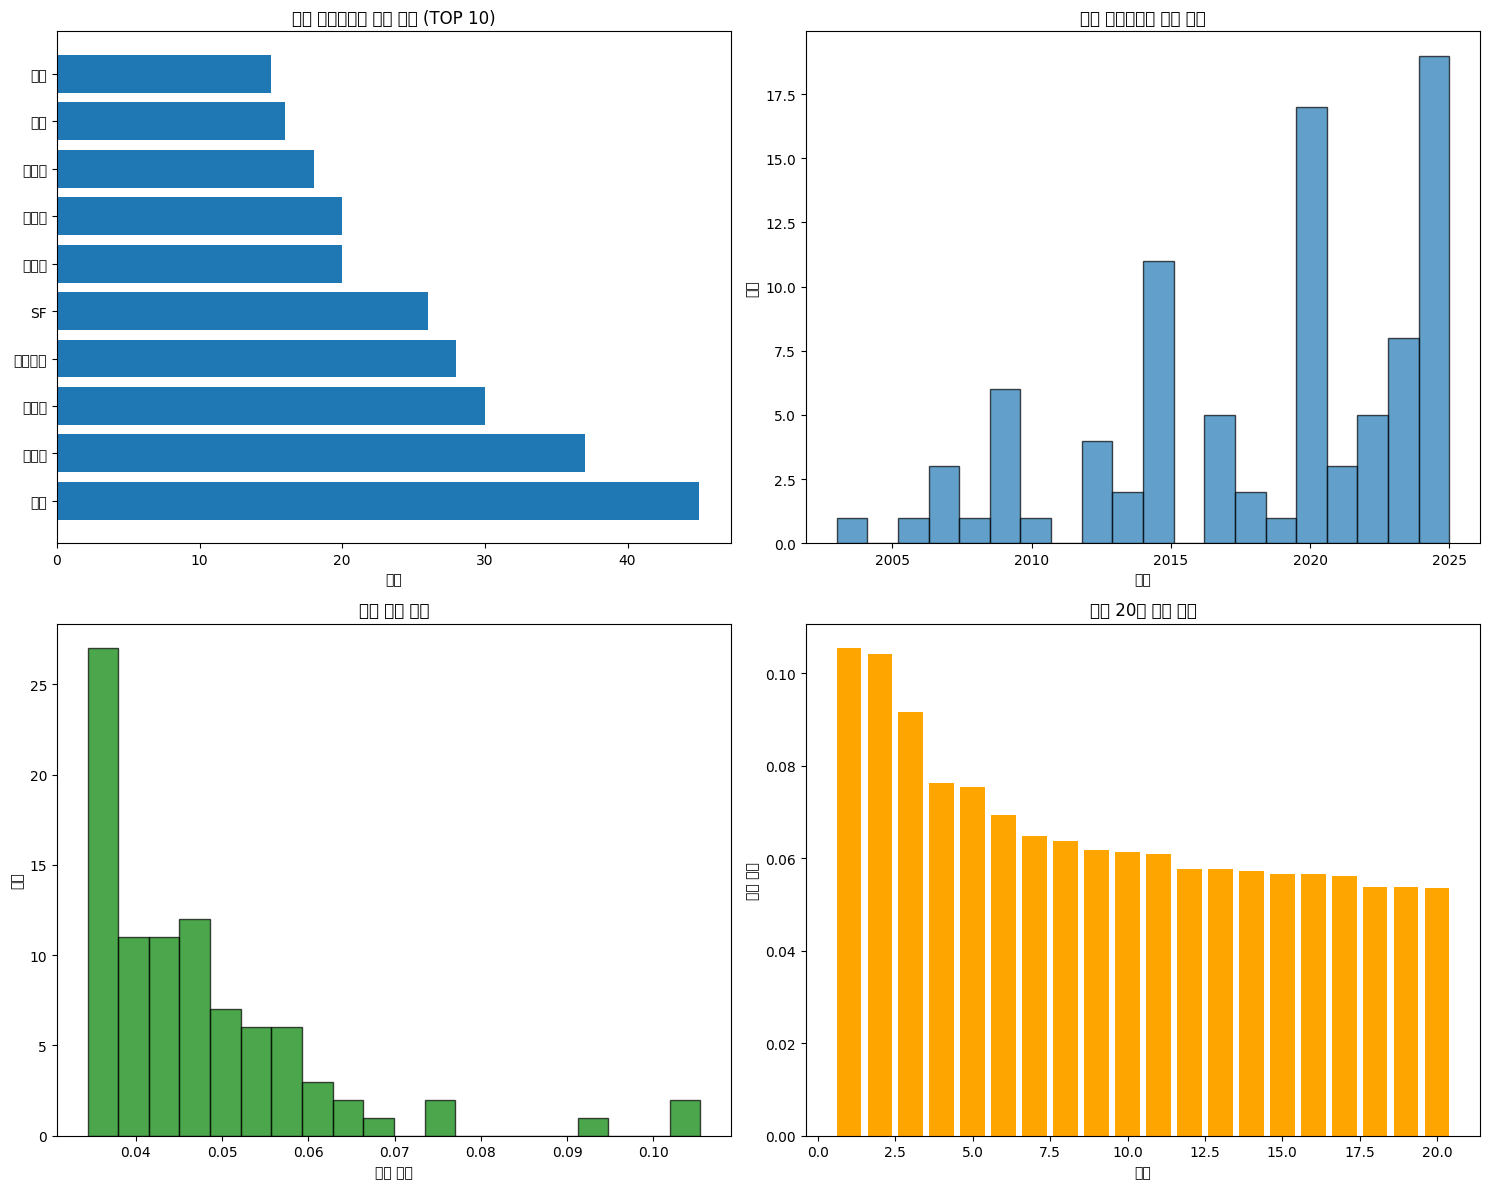


🎬 하이브리드 애니메이션 추천 시스템 - 최종 결과
📊 추천 개요:
   • 전체 애니메이션: 4,453개
   • 사용자 평가: 좋아요 8개, 싫어요 3개
   • 최종 추천: 91개
   • 사용 방법: tfidf_backup

🏆 상위 20개 추천 애니메이션:
--------------------------------------------------------------------------------
 1. 【SD 건담 월드 히어로즈】(2021.0)
     장르: 액션|메카
     감독: 이케조에 타카히로
     추천점수: 0.1055 | 애니메이션 ID: 503
     줄거리: 영웅들이 균형을 유지하는 세계.그중 하나인 네오 월드에 갑자기 적열 운석이 날아온다.낙하지점에 나타난 건 자칭 '오공 임펄스 건담'이라는 기억을 상실한 소년.이 사건으로 촉발된 혼...

 2. 【트러스트】(2025.0)
     장르: 미스터리|SF
     감독: Chizuru Kakimoto, Tomofumi Inoue
     추천점수: 0.1042 | 애니메이션 ID: 4241
     줄거리: 등록된 줄거리가 없습니다.

 3. 【세기말 하모니】(2015.0)
     장르: 미스터리|심리|SF|스릴러
     감독: Michael Arias, 나카무라 타카시
     추천점수: 0.0917 | 애니메이션 ID: 2237
     줄거리: 등록된 줄거리가 없습니다.

 4. 【다윈즈 게임】(2020.0)
     장르: 액션|미스터리|SF|스릴러
     감독: 도쿠모토 요시노부
     추천점수: 0.0763 | 애니메이션 ID: 914
     줄거리: 등록된 줄거리가 없습니다.

 5. 【이드: 인베이디드】(2020.0)
     장르: 드라마|미스터리|심리|SF|스릴러
     감독: 아오키 에이
     추천점수: 0.0754 | 애니메이션 ID: 2129
     줄거리: 등록된 줄거리가 없습니다.

 6. 【[극장판]귀멸의 칼날: 무한열차 편】(

In [36]:
import pandas as pd
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import json

# Task 8: 결과 필터링 및 출력

class RecommendationFinalizer:
    def __init__(self):
        """추천 결과 최종 처리기 초기화"""
        self.anime_data = None
        self.recommendations = None
        self.liked_animes = None
        self.disliked_animes = None
        self.total_animes = None
        self.method = None

    def load_recommendation_results(self, load_path="final_recommendations_backup.pkl"):
        """Task 7에서 생성한 추천 결과 로드"""
        print("=== 추천 결과 로드 중 ===")

        if not os.path.exists(load_path):
            print(f"❌ 추천 결과 파일을 찾을 수 없습니다: {load_path}")
            print("먼저 Task 7을 실행하여 추천 결과를 생성해주세요.")
            return False

        with open(load_path, 'rb') as f:
            data = pickle.load(f)

        self.recommendations = data['recommendations']
        self.liked_animes = data['liked_animes']
        self.disliked_animes = data['disliked_animes']
        self.total_animes = data['total_animes']
        self.method = data.get('method', 'unknown')

        print(f"✅ 추천 결과 로드 완료:")
        print(f"   - 추천 애니메이션: {len(self.recommendations)}개")
        print(f"   - 좋아요: {len(self.liked_animes)}개")
        print(f"   - 싫어요: {len(self.disliked_animes)}개")
        print(f"   - 전체 애니메이션: {self.total_animes}개")
        print(f"   - 사용 방법: {self.method}")

        return True

    def load_anime_data(self):
        """애니메이션 메타데이터 로드"""
        data_path = "anime_data_with_features.csv"
        if not os.path.exists(data_path):
            print(f"❌ 애니메이션 데이터를 찾을 수 없습니다: {data_path}")
            return False

        self.anime_data = pd.read_csv(data_path)
        print(f"✅ 애니메이션 메타데이터 로드 완료: {len(self.anime_data)}개")

        return True

    def verify_and_clean_recommendations(self):
        """추천 결과 검증 및 정리"""
        print(f"\n=== 추천 결과 검증 및 정리 ===")

        initial_count = len(self.recommendations)

        # 1. 유효한 인덱스인지 확인
        valid_recommendations = []
        for idx, score in self.recommendations:
            if 0 <= idx < len(self.anime_data):
                valid_recommendations.append((idx, score))
            else:
                print(f"⚠️ 유효하지 않은 인덱스 제거: {idx}")

        # 2. 이미 평가한 애니메이션 재확인
        evaluated_set = set(self.liked_animes + self.disliked_animes)
        clean_recommendations = []
        removed_count = 0

        for idx, score in valid_recommendations:
            if idx not in evaluated_set:
                clean_recommendations.append((idx, score))
            else:
                removed_count += 1

        self.recommendations = clean_recommendations

        print(f"✅ 검증 완료:")
        print(f"   - 초기 추천: {initial_count}개")
        print(f"   - 유효한 추천: {len(valid_recommendations)}개")
        print(f"   - 평가 제외: {removed_count}개")
        print(f"   - 최종 추천: {len(self.recommendations)}개")

        return True

    def apply_additional_filters(self, min_year=None, max_year=None, include_genres=None, exclude_genres=None):
        """추가 필터링 적용"""
        print(f"\n=== 추가 필터링 적용 ===")

        filtered_recommendations = []
        filter_stats = {
            'year_filtered': 0,
            'genre_include_filtered': 0,
            'genre_exclude_filtered': 0,
            'total_removed': 0
        }

        for idx, score in self.recommendations:
            anime = self.anime_data.iloc[idx]
            should_include = True

            # 연도 필터링
            if min_year is not None or max_year is not None:
                year = anime.get('year')
                if pd.notna(year):
                    try:
                        year = int(float(year))
                        if min_year is not None and year < min_year:
                            should_include = False
                            filter_stats['year_filtered'] += 1
                        elif max_year is not None and year > max_year:
                            should_include = False
                            filter_stats['year_filtered'] += 1
                    except (ValueError, TypeError):
                        pass

            # 포함 장르 필터링
            if include_genres and should_include:
                genres = str(anime.get('genres', '')).lower()
                if not any(genre.lower() in genres for genre in include_genres):
                    should_include = False
                    filter_stats['genre_include_filtered'] += 1

            # 제외 장르 필터링
            if exclude_genres and should_include:
                genres = str(anime.get('genres', '')).lower()
                if any(genre.lower() in genres for genre in exclude_genres):
                    should_include = False
                    filter_stats['genre_exclude_filtered'] += 1

            if should_include:
                filtered_recommendations.append((idx, score))
            else:
                filter_stats['total_removed'] += 1

        if any(filter_stats.values()):
            print(f"필터링 결과:")
            if min_year or max_year:
                print(f"   - 연도 조건 ({min_year}-{max_year}): {filter_stats['year_filtered']}개 제외")
            if include_genres:
                print(f"   - 장르 포함 조건 ({include_genres}): {filter_stats['genre_include_filtered']}개 제외")
            if exclude_genres:
                print(f"   - 장르 제외 조건 ({exclude_genres}): {filter_stats['genre_exclude_filtered']}개 제외")
            print(f"   - 총 제외: {filter_stats['total_removed']}개")
            print(f"   - 남은 추천: {len(filtered_recommendations)}개")

            self.recommendations = filtered_recommendations
        else:
            print("추가 필터링 조건이 없어 모든 추천을 유지합니다.")

        return True

    def extract_final_top_100(self):
        """최종 상위 100개 추출"""
        print(f"\n=== 최종 상위 100개 추출 ===")

        # 이미 정렬되어 있지만 재정렬하여 확실히 함
        self.recommendations.sort(key=lambda x: x[1], reverse=True)

        # 상위 100개 추출
        final_top_100 = self.recommendations[:100]

        print(f"✅ 최종 추천 100개 추출 완료")
        if final_top_100:
            print(f"   - 1위 점수: {final_top_100[0][1]:.4f}")
            print(f"   - 100위 점수: {final_top_100[-1][1]:.4f}" if len(final_top_100) >= 100 else f"   - {len(final_top_100)}위 점수: {final_top_100[-1][1]:.4f}")

        return final_top_100

    def analyze_recommendation_patterns(self, final_recommendations):
        """추천 결과 패턴 분석"""
        print(f"\n=== 추천 결과 패턴 분석 ===")

        # 데이터 수집
        genres_list = []
        years_list = []
        studios_list = []

        for idx, score in final_recommendations:
            anime = self.anime_data.iloc[idx]

            # 장르 분석
            genres = anime.get('genres', '')
            if pd.notna(genres) and genres:
                for genre in str(genres).replace('|', ',').split(','):
                    genre = genre.strip()
                    if genre and genre.lower() != 'nan':
                        genres_list.append(genre)

            # 연도 분석
            year = anime.get('year')
            if pd.notna(year):
                try:
                    years_list.append(int(float(year)))
                except (ValueError, TypeError):
                    pass

            # 제작사 분석
            studio = anime.get('studio', '')
            if pd.notna(studio) and studio and studio.lower() != 'nan':
                studios_list.append(str(studio).strip())

        # 분석 결과
        analysis_results = {}

        # 1. 장르 분석
        if genres_list:
            genre_counter = Counter(genres_list)
            analysis_results['top_genres'] = genre_counter.most_common(10)
            print(f"인기 장르 TOP 10:")
            for genre, count in analysis_results['top_genres']:
                percentage = (count / len(final_recommendations)) * 100
                print(f"   - {genre}: {count}개 ({percentage:.1f}%)")

        # 2. 연도 분석
        if years_list:
            analysis_results['year_stats'] = {
                'mean': np.mean(years_list),
                'median': np.median(years_list),
                'min': min(years_list),
                'max': max(years_list),
                'std': np.std(years_list)
            }
            print(f"\n연도 분포:")
            print(f"   - 평균: {analysis_results['year_stats']['mean']:.1f}")
            print(f"   - 중앙값: {analysis_results['year_stats']['median']:.1f}")
            print(f"   - 범위: {analysis_results['year_stats']['min']} ~ {analysis_results['year_stats']['max']}")
            print(f"   - 표준편차: {analysis_results['year_stats']['std']:.1f}")

        # 3. 제작사 분석
        if studios_list:
            studio_counter = Counter(studios_list)
            analysis_results['top_studios'] = studio_counter.most_common(10)
            print(f"\n인기 제작사 TOP 10:")
            for studio, count in analysis_results['top_studios']:
                print(f"   - {studio}: {count}개")

        return analysis_results

    def create_comprehensive_report(self, final_recommendations, analysis_results):
        """종합 보고서 생성"""
        print(f"\n=== 종합 보고서 생성 ===")

        report = {
            'summary': {
                'total_recommendations': len(final_recommendations),
                'user_liked_count': len(self.liked_animes),
                'user_disliked_count': len(self.disliked_animes),
                'recommendation_method': self.method,
                'score_range': {
                    'highest': final_recommendations[0][1] if final_recommendations else 0,
                    'lowest': final_recommendations[-1][1] if final_recommendations else 0
                }
            },
            'user_preference_analysis': self.analyze_user_preferences(),
            'recommendation_analysis': analysis_results,
            'top_recommendations': []
        }

        # 상위 20개 상세 정보
        for i, (idx, score) in enumerate(final_recommendations[:20]):
            anime = self.anime_data.iloc[idx]
            report['top_recommendations'].append({
                'rank': i + 1,
                'index': int(idx),
                'title_korean': anime.get('title_korean', '제목 없음'),
                'title_japanese': anime.get('title_japanese', ''),
                'title_english': anime.get('title_english', ''),
                'year': anime.get('year', ''),
                'genres': anime.get('genres', ''),
                'director': anime.get('director', ''),
                'studio': anime.get('studio', ''),
                'synopsis': anime.get('synopsis', '')[:200] if pd.notna(anime.get('synopsis')) else '',
                'recommendation_score': float(score)
            })

        return report

    def analyze_user_preferences(self):
        """사용자 선호도 분석"""
        liked_genres = []
        disliked_genres = []

        # 좋아요 애니메이션 분석
        for idx in self.liked_animes:
            anime = self.anime_data.iloc[idx]
            genres = anime.get('genres', '')
            if pd.notna(genres) and genres:
                for genre in str(genres).replace('|', ',').split(','):
                    genre = genre.strip()
                    if genre and genre.lower() != 'nan':
                        liked_genres.append(genre)

        # 싫어요 애니메이션 분석
        for idx in self.disliked_animes:
            anime = self.anime_data.iloc[idx]
            genres = anime.get('genres', '')
            if pd.notna(genres) and genres:
                for genre in str(genres).replace('|', ',').split(','):
                    genre = genre.strip()
                    if genre and genre.lower() != 'nan':
                        disliked_genres.append(genre)

        return {
            'liked_genres': Counter(liked_genres).most_common(5),
            'disliked_genres': Counter(disliked_genres).most_common(5),
            'liked_titles': [self.anime_data.iloc[idx].get('title_korean', '제목 없음') for idx in self.liked_animes],
            'disliked_titles': [self.anime_data.iloc[idx].get('title_korean', '제목 없음') for idx in self.disliked_animes]
        }

    def visualize_recommendations(self, final_recommendations, analysis_results):
        """추천 결과 시각화"""
        print(f"\n=== 추천 결과 시각화 ===")

        fig, axes = plt.subplots(2, 2, figsize=(15, 12))

        # 1. 장르 분포 (상위 10개)
        if 'top_genres' in analysis_results:
            genres, counts = zip(*analysis_results['top_genres'])
            axes[0, 0].barh(range(len(genres)), counts)
            axes[0, 0].set_yticks(range(len(genres)))
            axes[0, 0].set_yticklabels(genres)
            axes[0, 0].set_title('추천 애니메이션 장르 분포 (TOP 10)')
            axes[0, 0].set_xlabel('개수')

        # 2. 연도 분포
        years = []
        for idx, score in final_recommendations:
            year = self.anime_data.iloc[idx].get('year')
            if pd.notna(year):
                try:
                    years.append(int(float(year)))
                except (ValueError, TypeError):
                    pass

        if years:
            axes[0, 1].hist(years, bins=20, alpha=0.7, edgecolor='black')
            axes[0, 1].set_title('추천 애니메이션 연도 분포')
            axes[0, 1].set_xlabel('연도')
            axes[0, 1].set_ylabel('개수')

        # 3. 추천 점수 분포
        scores = [score for idx, score in final_recommendations]
        axes[1, 0].hist(scores, bins=20, alpha=0.7, edgecolor='black', color='green')
        axes[1, 0].set_title('추천 점수 분포')
        axes[1, 0].set_xlabel('추천 점수')
        axes[1, 0].set_ylabel('개수')

        # 4. 상위 20개 점수 막대그래프
        top_20_scores = scores[:20]
        axes[1, 1].bar(range(1, len(top_20_scores) + 1), top_20_scores, color='orange')
        axes[1, 1].set_title('상위 20개 추천 점수')
        axes[1, 1].set_xlabel('순위')
        axes[1, 1].set_ylabel('추천 점수')

        plt.tight_layout()
        plt.savefig('recommendation_analysis.png', dpi=150, bbox_inches='tight')
        print("📊 시각화 결과가 'recommendation_analysis.png'에 저장되었습니다.")
        plt.show()

    def display_final_results(self, final_recommendations, top_n=20):
        """최종 결과 출력"""
        print(f"\n" + "="*80)
        print(f"🎬 하이브리드 애니메이션 추천 시스템 - 최종 결과")
        print(f"="*80)
        print(f"📊 추천 개요:")
        print(f"   • 전체 애니메이션: {self.total_animes:,}개")
        print(f"   • 사용자 평가: 좋아요 {len(self.liked_animes)}개, 싫어요 {len(self.disliked_animes)}개")
        print(f"   • 최종 추천: {len(final_recommendations)}개")
        print(f"   • 사용 방법: {self.method}")

        print(f"\n🏆 상위 {top_n}개 추천 애니메이션:")
        print("-" * 80)

        for i, (idx, score) in enumerate(final_recommendations[:top_n]):
            anime = self.anime_data.iloc[idx]
            title = anime.get('title_korean', '제목 없음')
            year = anime.get('year', 'N/A')
            genres = anime.get('genres', '장르 정보 없음')
            director = anime.get('director', '감독 정보 없음')

            print(f"{i+1:2d}. 【{title}】({year})")
            print(f"     장르: {genres}")
            print(f"     감독: {director}")
            print(f"     추천점수: {score:.4f} | 애니메이션 ID: {idx}")

            # 줄거리가 있다면 간략히 출력
            synopsis = anime.get('synopsis', '')
            if pd.notna(synopsis) and synopsis and len(synopsis) > 10:
                synopsis_short = synopsis[:100] + "..." if len(synopsis) > 100 else synopsis
                print(f"     줄거리: {synopsis_short}")
            print()

    def save_final_results(self, final_recommendations, report, save_id_list_path="final_100_anime_ids.txt",
                          save_detailed_path="detailed_recommendations.json", save_report_path="recommendation_report.json"):
        """최종 결과 저장"""
        print(f"\n=== 최종 결과 저장 ===")

        # 1. 상위 100개 ID만 텍스트 파일로 저장
        with open(save_id_list_path, 'w', encoding='utf-8') as f:
            f.write("# 하이브리드 애니메이션 추천 시스템 - 상위 100개 추천 애니메이션 ID\n")
            f.write(f"# 생성일: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
            f.write(f"# 총 추천 개수: {len(final_recommendations)}\n\n")

            for i, (idx, score) in enumerate(final_recommendations[:100]):
                f.write(f"{idx}\n")

        print(f"✅ 상위 100개 ID 저장: {save_id_list_path}")

        # 2. 상세 정보 JSON으로 저장
        detailed_data = []
        for i, (idx, score) in enumerate(final_recommendations[:100]):
            anime = self.anime_data.iloc[idx]
            detailed_data.append({
                'rank': i + 1,
                'anime_id': int(idx),
                'title_korean': anime.get('title_korean', ''),
                'title_japanese': anime.get('title_japanese', ''),
                'title_english': anime.get('title_english', ''),
                'year': anime.get('year', ''),
                'genres': anime.get('genres', ''),
                'director': anime.get('director', ''),
                'studio': anime.get('studio', ''),
                'synopsis': anime.get('synopsis', ''),
                'recommendation_score': float(score)
            })

        with open(save_detailed_path, 'w', encoding='utf-8') as f:
            json.dump(detailed_data, f, ensure_ascii=False, indent=2)

        print(f"✅ 상세 추천 정보 저장: {save_detailed_path}")

        # 3. 종합 보고서 저장
        with open(save_report_path, 'w', encoding='utf-8') as f:
            json.dump(report, f, ensure_ascii=False, indent=2)

        print(f"✅ 종합 보고서 저장: {save_report_path}")

        return True

# 실행
if __name__ == "__main__":
    print("=== Task 8: 결과 필터링 및 출력 ===\n")

    # 1. 최종 처리기 초기화
    finalizer = RecommendationFinalizer()

    # 2. 추천 결과 및 데이터 로드
    if not finalizer.load_recommendation_results():
        exit(1)

    if not finalizer.load_anime_data():
        exit(1)

    # 3. 추천 결과 검증 및 정리
    if not finalizer.verify_and_clean_recommendations():
        exit(1)

    # 4. 추가 필터링 (선택사항)
    # 예시: 2000년 이후, 에치/성인 장르 제외
    finalizer.apply_additional_filters(
        min_year=2000,
        exclude_genres=['에치', '성인', 'Ecchi', 'Hentai']
    )

    # 5. 최종 상위 100개 추출
    final_top_100 = finalizer.extract_final_top_100()

    # 6. 추천 결과 패턴 분석
    analysis_results = finalizer.analyze_recommendation_patterns(final_top_100)

    # 7. 종합 보고서 생성
    comprehensive_report = finalizer.create_comprehensive_report(final_top_100, analysis_results)

    # 8. 시각화
    finalizer.visualize_recommendations(final_top_100, analysis_results)

    # 9. 최종 결과 출력
    finalizer.display_final_results(final_top_100, top_n=20)

    # 10. 최종 결과 저장
    finalizer.save_final_results(final_top_100, comprehensive_report)

    print(f"\n" + "="*80)
    print(f"🎉 하이브리드 애니메이션 추천 시스템 완성!")
    print(f"="*80)
    print("✅ Task 8 완료:")
    print("✅ 추천 결과 검증 및 정리 완료")
    print("✅ 추가 필터링 적용 완료")
    print("✅ 최종 상위 100개 추출 완료")
    print("✅ 패턴 분석 및 시각화 완료")
    print("✅ 종합 보고서 생성 완료")
    print("✅ 최종 결과 저장 완료")
    print(f"\n📁 생성된 파일:")
    print(f"   • final_100_anime_ids.txt - 상위 100개 ID")
    print(f"   • detailed_recommendations.json - 상세 추천 정보")
    print(f"   • recommendation_report.json - 종합 보고서")
    print(f"   • recommendation_analysis.png - 분석 시각화")
    print(f"\n🎬 추천 시스템이 성공적으로 완성되었습니다!")

In [38]:
!pip install accelerate

In [39]:
import pandas as pd
import numpy as np
import pickle
import os
import torch
from transformers import AutoTokenizer, AutoModel, AutoModelForCausalLM
import gc

# Task 5 수정: 카나나 모델 성공적 로드 및 LLM 프로필 생성

class KananaLLMProfileGenerator:
    def __init__(self):
        """카나나 모델 전용 LLM 프로필 생성기"""
        self.embedding_tokenizer = None
        self.embedding_model = None
        self.instruct_tokenizer = None
        self.instruct_model = None
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.anime_data = None

        # 메모리 관리 설정
        if torch.cuda.is_available():
            torch.cuda.empty_cache()
            print(f"GPU 메모리 사용 가능: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f}GB")

    def load_embedding_model_safely(self):
        """안전한 카나나 임베딩 모델 로드"""
        print("=== 카나나 임베딩 모델 로드 시도 ===")

        try:
            model_name = "kakaocorp/kanana-nano-2.1b-embedding"

            # 1. 토크나이저 먼저 로드
            print("토크나이저 로드 중...")
            self.embedding_tokenizer = AutoTokenizer.from_pretrained(
                model_name,
                trust_remote_code=True,
                use_fast=False  # 안정성을 위해 slow tokenizer 사용
            )

            # 2. 모델 로드 (메모리 효율적 설정)
            print("임베딩 모델 로드 중...")
            self.embedding_model = AutoModel.from_pretrained(
                model_name,
                trust_remote_code=True,
                torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32,
                low_cpu_mem_usage=True
            )

            # 디바이스로 수동 이동
            if torch.cuda.is_available():
                self.embedding_model = self.embedding_model.to(self.device)

            # 평가 모드로 설정
            self.embedding_model.eval()

            print("✅ 카나나 임베딩 모델 로드 성공!")
            return True

        except Exception as e:
            print(f"❌ 카나나 임베딩 모델 로드 실패: {e}")
            print("상세 오류 정보:")
            import traceback
            traceback.print_exc()
            return False

    def load_instruct_model_safely(self):
        """안전한 카나나 인스트럭트 모델 로드"""
        print("\n=== 카나나 인스트럭트 모델 로드 시도 ===")

        try:
            model_name = "kakaocorp/kanana-nano-2.1b-instruct"

            # GPU 메모리 정리
            if torch.cuda.is_available():
                torch.cuda.empty_cache()
                gc.collect()

            # 1. 토크나이저 로드
            print("인스트럭트 토크나이저 로드 중...")
            self.instruct_tokenizer = AutoTokenizer.from_pretrained(
                model_name,
                trust_remote_code=True,
                use_fast=False
            )

            # 특수 토큰 설정
            if self.instruct_tokenizer.pad_token is None:
                self.instruct_tokenizer.pad_token = self.instruct_tokenizer.eos_token

            # 2. 모델 로드 (매우 보수적 설정)
            print("인스트럭트 모델 로드 중...")
            self.instruct_model = AutoModelForCausalLM.from_pretrained(
                model_name,
                trust_remote_code=True,
                torch_dtype=torch.float16,
                low_cpu_mem_usage=True,
                device_map="auto" if torch.cuda.is_available() else "cpu"
            )

            # 평가 모드로 설정
            self.instruct_model.eval()

            print("✅ 카나나 인스트럭트 모델 로드 성공!")
            return True

        except Exception as e:
            print(f"❌ 카나나 인스트럭트 모델 로드 실패: {e}")
            print("메모리 부족이 원인일 수 있습니다.")
            return False

    def load_required_data(self):
        """필요한 데이터 로드"""
        data_path = "anime_data_with_features.csv"
        if not os.path.exists(data_path):
            print(f"❌ 데이터 파일을 찾을 수 없습니다: {data_path}")
            return False

        self.anime_data = pd.read_csv(data_path)
        print(f"✅ 애니메이션 데이터 로드 완료: {len(self.anime_data)}개")
        return True

    def load_user_feedback(self, feedback_path="user_feedback.pkl"):
        """사용자 피드백 로드"""
        if not os.path.exists(feedback_path):
            print(f"❌ 피드백 파일을 찾을 수 없습니다: {feedback_path}")
            return None, None

        with open(feedback_path, 'rb') as f:
            feedback_data = pickle.load(f)

        liked_animes = feedback_data['liked_animes']
        disliked_animes = feedback_data['disliked_animes']

        print(f"✅ 사용자 피드백 로드 완료: 좋아요 {len(liked_animes)}개, 싫어요 {len(disliked_animes)}개")
        return liked_animes, disliked_animes

    def create_rich_prompt(self, liked_animes, disliked_animes):
        """풍부한 정보를 담은 프롬프트 생성"""
        print("\n=== 풍부한 프롬프트 생성 중 ===")

        # 좋아요 애니메이션 상세 정보
        liked_details = []
        for idx in liked_animes[:5]:  # 너무 길지 않게 상위 5개만
            anime = self.anime_data.iloc[idx]
            title = anime.get('title_korean', '제목 없음')
            genres = anime.get('genres', '장르 없음')
            year = anime.get('year', '연도 없음')
            synopsis = anime.get('synopsis', '')

            detail = f"'{title}' ({year}) - 장르: {genres}"
            if synopsis and len(synopsis) > 20:
                detail += f" - 줄거리: {synopsis[:100]}..."
            liked_details.append(detail)

        # 싫어요 애니메이션 상세 정보
        disliked_details = []
        for idx in disliked_animes[:3]:  # 싫어요는 3개만
            anime = self.anime_data.iloc[idx]
            title = anime.get('title_korean', '제목 없음')
            genres = anime.get('genres', '장르 없음')
            year = anime.get('year', '연도 없음')

            detail = f"'{title}' ({year}) - 장르: {genres}"
            disliked_details.append(detail)

        # 한국어 프롬프트 생성
        prompt = f"""애니메이션 취향 분석을 도와주세요.

사용자가 좋아하는 애니메이션들:
{chr(10).join([f"• {detail}" for detail in liked_details])}

사용자가 싫어하는 애니메이션들:
{chr(10).join([f"• {detail}" for detail in disliked_details])}

위의 정보를 바탕으로 이 사용자의 애니메이션 취향을 분석해주세요.
다음 요소들을 고려하여 3-4문장으로 간결하게 요약해주세요:
1. 선호하는 장르와 테마
2. 선호하는 스토리 스타일이나 분위기
3. 피하는 요소들
4. 전반적인 취향 특성

분석 결과:"""

        print(f"프롬프트 생성 완료 (길이: {len(prompt)}자)")
        return prompt

    def generate_with_kanana_instruct(self, prompt):
        """카나나 인스트럭트 모델로 텍스트 생성"""
        print("\n=== 카나나 인스트럭트 모델로 취향 분석 생성 ===")

        if self.instruct_model is None or self.instruct_tokenizer is None:
            print("❌ 인스트럭트 모델이 로드되지 않았습니다.")
            return None

        try:
            # 입력 토큰화
            inputs = self.instruct_tokenizer(
                prompt,
                return_tensors="pt",
                truncation=True,
                max_length=1024,  # 입력 길이 제한
                padding=True
            )

            # GPU로 이동 (가능한 경우)
            if torch.cuda.is_available():
                inputs = {k: v.to(self.device) for k, v in inputs.items()}

            # 생성 파라미터 설정
            generation_config = {
                "max_new_tokens": 200,
                "min_new_tokens": 50,
                "do_sample": True,
                "temperature": 0.7,
                "top_p": 0.9,
                "top_k": 50,
                "repetition_penalty": 1.1,
                "pad_token_id": self.instruct_tokenizer.eos_token_id,
                "eos_token_id": self.instruct_tokenizer.eos_token_id
            }

            print("텍스트 생성 중...")
            with torch.no_grad():
                outputs = self.instruct_model.generate(
                    **inputs,
                    **generation_config
                )

            # 디코딩
            generated_text = self.instruct_tokenizer.decode(
                outputs[0],
                skip_special_tokens=True
            )

            # 입력 프롬프트 제거하고 생성된 부분만 추출
            if "분석 결과:" in generated_text:
                result = generated_text.split("분석 결과:")[-1].strip()
            else:
                # 입력 길이만큼 제거
                result = generated_text[len(prompt):].strip()

            # 결과 정리
            if result:
                # 문장 단위로 정리
                sentences = result.split('.')
                # 처음 3-4 문장만 사용
                clean_result = '. '.join(sentences[:4]).strip()
                if clean_result and not clean_result.endswith('.'):
                    clean_result += '.'

                print(f"✅ 카나나 모델 생성 성공!")
                print(f"생성된 취향 분석 (길이: {len(clean_result)}자):")
                print(f"'{clean_result}'")

                return clean_result
            else:
                print("⚠️ 생성된 텍스트가 비어있습니다.")
                return None

        except Exception as e:
            print(f"❌ 텍스트 생성 중 오류: {e}")
            import traceback
            traceback.print_exc()
            return None

        finally:
            # 메모리 정리
            if torch.cuda.is_available():
                torch.cuda.empty_cache()

    def text_to_embedding_kanana(self, text):
        """카나나 임베딩 모델로 텍스트를 벡터로 변환"""
        if self.embedding_model is None or self.embedding_tokenizer is None:
            raise ValueError("임베딩 모델이 로드되지 않았습니다!")

        try:
            inputs = self.embedding_tokenizer(
                text,
                return_tensors="pt",
                truncation=True,
                padding=True,
                max_length=512
            )

            if torch.cuda.is_available():
                inputs = {k: v.to(self.device) for k, v in inputs.items()}

            with torch.no_grad():
                outputs = self.embedding_model(**inputs)
                # 평균 풀링
                embeddings = outputs.last_hidden_state.mean(dim=1)

            return embeddings.cpu().numpy().flatten()

        except Exception as e:
            print(f"❌ 임베딩 변환 중 오류: {e}")
            raise

    def generate_llm_profile_kanana(self, liked_animes, disliked_animes):
        """카나나 모델을 사용한 완전한 LLM 프로필 생성"""
        print("\n=== 카나나 모델 기반 LLM 프로필 생성 시작 ===")

        # 1. 풍부한 프롬프트 생성
        prompt = self.create_rich_prompt(liked_animes, disliked_animes)

        # 2. 카나나 인스트럭트로 취향 분석 생성
        taste_analysis = self.generate_with_kanana_instruct(prompt)

        if taste_analysis is None:
            print("❌ LLM 프로필 생성 실패")
            return None, None

        # 3. 생성된 분석을 카나나 임베딩으로 벡터화
        print("\n=== 취향 분석을 임베딩으로 변환 ===")
        try:
            v_llm_profile = self.text_to_embedding_kanana(taste_analysis)
            print(f"✅ LLM 프로필 벡터 생성 완료: {v_llm_profile.shape}")

            # 벡터 품질 확인
            norm = np.linalg.norm(v_llm_profile)
            print(f"벡터 크기: {norm:.4f}")
            print(f"비영 요소: {np.count_nonzero(v_llm_profile)}/{len(v_llm_profile)}")

            return v_llm_profile, taste_analysis

        except Exception as e:
            print(f"❌ 임베딩 변환 실패: {e}")
            return None, None

    def save_kanana_llm_profile(self, v_llm_profile, taste_analysis, save_path="kanana_llm_profile.npz"):
        """카나나 기반 LLM 프로필 저장"""
        np.savez(save_path,
                v_llm_profile=v_llm_profile,
                taste_analysis=np.array([taste_analysis], dtype=object),
                method="kanana_instruct")

        print(f"✅ 카나나 LLM 프로필 저장 완료: {save_path}")

# 실행
if __name__ == "__main__":
    print("=== Task 5 수정: 카나나 모델 성공적 로드 및 LLM 프로필 생성 ===\n")

    # 1. 생성기 초기화
    generator = KananaLLMProfileGenerator()

    # 2. 데이터 로드
    if not generator.load_required_data():
        exit(1)

    # 3. 사용자 피드백 로드
    liked_animes, disliked_animes = generator.load_user_feedback()
    if liked_animes is None:
        exit(1)

    # 4. 카나나 임베딩 모델 로드 시도
    if not generator.load_embedding_model_safely():
        print("❌ 임베딩 모델 로드 실패, 프로그램 종료")
        exit(1)

    # 5. 카나나 인스트럭트 모델 로드 시도
    if not generator.load_instruct_model_safely():
        print("❌ 인스트럭트 모델 로드 실패")
        print("메모리 부족일 가능성이 높습니다.")
        print("다음을 시도해보세요:")
        print("1. 다른 프로그램들 종료하여 메모리 확보")
        print("2. Google Colab Pro 사용")
        print("3. 더 작은 모델 사용")
        exit(1)

    # 6. 카나나 기반 LLM 프로필 생성
    v_llm_profile, taste_analysis = generator.generate_llm_profile_kanana(liked_animes, disliked_animes)

    if v_llm_profile is not None:
        # 7. 결과 저장
        generator.save_kanana_llm_profile(v_llm_profile, taste_analysis)

        print(f"\n=== 카나나 LLM 프로필 생성 성공! ===")
        print(f"생성된 취향 분석:")
        print(f"'{taste_analysis}'")
        print(f"벡터 차원: {v_llm_profile.shape}")
        print(f"이제 이 결과를 Task 6에서 사용할 수 있습니다!")
    else:
        print("❌ LLM 프로필 생성에 실패했습니다.")

=== Task 5 수정: 카나나 모델 성공적 로드 및 LLM 프로필 생성 ===

✅ 애니메이션 데이터 로드 완료: 4453개
✅ 사용자 피드백 로드 완료: 좋아요 8개, 싫어요 3개
=== 카나나 임베딩 모델 로드 시도 ===
토크나이저 로드 중...
임베딩 모델 로드 중...
✅ 카나나 임베딩 모델 로드 성공!

=== 카나나 인스트럭트 모델 로드 시도 ===
인스트럭트 토크나이저 로드 중...
인스트럭트 모델 로드 중...
❌ 카나나 인스트럭트 모델 로드 실패: Using a `device_map`, `tp_plan`, `torch.device` context manager or setting `torch.set_default_device(device)` requires `accelerate`. You can install it with `pip install accelerate`
메모리 부족이 원인일 수 있습니다.
❌ 인스트럭트 모델 로드 실패
메모리 부족일 가능성이 높습니다.
다음을 시도해보세요:
1. 다른 프로그램들 종료하여 메모리 확보
2. Google Colab Pro 사용
3. 더 작은 모델 사용

=== 카나나 모델 기반 LLM 프로필 생성 시작 ===

=== 풍부한 프롬프트 생성 중 ===
프롬프트 생성 완료 (길이: 673자)

=== 카나나 인스트럭트 모델로 취향 분석 생성 ===
❌ 인스트럭트 모델이 로드되지 않았습니다.
❌ LLM 프로필 생성 실패
❌ LLM 프로필 생성에 실패했습니다.


In [40]:
!pip install accelerate

In [44]:
import pandas as pd
import numpy as np
import pickle
import os
import torch
from transformers import AutoTokenizer, AutoModel, AutoModelForCausalLM
import gc

# Task 5 단순화: 최소 설정으로 카나나 모델 로드

class SimpleKananaGenerator:
    def __init__(self):
        """단순화된 카나나 모델 생성기"""
        self.embedding_tokenizer = None
        self.embedding_model = None
        self.instruct_tokenizer = None
        self.instruct_model = None
        self.device = "cpu"  # 안전하게 CPU만 사용
        self.anime_data = None

    def load_data(self):
        """데이터 로드"""
        # 애니메이션 데이터
        data_path = "anime_data_with_features.csv"
        if not os.path.exists(data_path):
            return False
        self.anime_data = pd.read_csv(data_path)

        # 사용자 피드백
        feedback_path = "user_feedback.pkl"
        if not os.path.exists(feedback_path):
            return False
        with open(feedback_path, 'rb') as f:
            feedback_data = pickle.load(f)

        self.liked_animes = feedback_data['liked_animes']
        self.disliked_animes = feedback_data['disliked_animes']

        print(f"데이터 로드 완료: {len(self.anime_data)}개 애니메이션, 좋아요 {len(self.liked_animes)}개")
        return True

    def load_embedding_model_cpu(self):
        """CPU에서 임베딩 모델 로드"""
        print("카나나 임베딩 모델 로드 중 (CPU)...")

        try:
            model_name = "kakaocorp/kanana-nano-2.1b-embedding"

            self.embedding_tokenizer = AutoTokenizer.from_pretrained(
                model_name,
                trust_remote_code=True
            )

            self.embedding_model = AutoModel.from_pretrained(
                model_name,
                trust_remote_code=True,
                torch_dtype=torch.float32  # CPU에서는 float32 사용
            )

            self.embedding_model.eval()
            print("임베딩 모델 로드 성공!")
            return True

        except Exception as e:
            print(f"임베딩 모델 로드 실패: {e}")
            return False

    def load_instruct_model_cpu(self):
        """CPU에서 인스트럭트 모델 로드"""
        print("카나나 인스트럭트 모델 로드 중 (CPU)...")

        try:
            model_name = "kakaocorp/kanana-nano-2.1b-instruct"

            self.instruct_tokenizer = AutoTokenizer.from_pretrained(
                model_name,
                trust_remote_code=True
            )

            # 패딩 토큰 설정
            if self.instruct_tokenizer.pad_token is None:
                self.instruct_tokenizer.pad_token = self.instruct_tokenizer.eos_token

            # CPU에서 최소 설정으로 로드
            self.instruct_model = AutoModelForCausalLM.from_pretrained(
                model_name,
                trust_remote_code=True,
                torch_dtype=torch.float32
            )

            self.instruct_model.eval()
            print("인스트럭트 모델 로드 성공!")
            return True

        except Exception as e:
            print(f"인스트럭트 모델 로드 실패: {e}")
            return False

    def create_simple_prompt(self):
        """간단한 프롬프트 생성"""
        liked_titles = []
        disliked_titles = []

        for idx in self.liked_animes[:3]:
            title = self.anime_data.iloc[idx].get('title_korean', '제목없음')
            genres = self.anime_data.iloc[idx].get('genres', '')
            liked_titles.append(f"{title} ({genres})")

        for idx in self.disliked_animes[:2]:
            title = self.anime_data.iloc[idx].get('title_korean', '제목없음')
            genres = self.anime_data.iloc[idx].get('genres', '')
            disliked_titles.append(f"{title} ({genres})")

        prompt = f"""사용자 취향 분석:
좋아하는 애니메이션: {', '.join(liked_titles)}
싫어하는 애니메이션: {', '.join(disliked_titles)}

이 사용자의 애니메이션 취향을 3문장으로 요약해주세요:"""

        return prompt

    def generate_taste_analysis(self):
        """취향 분석 생성"""
        if self.instruct_model is None:
            print("인스트럭트 모델이 로드되지 않았습니다.")
            return None

        prompt = self.create_simple_prompt()
        print(f"프롬프트: {prompt}")

        try:
            inputs = self.instruct_tokenizer(
                prompt,
                return_tensors="pt",
                truncation=True,
                max_length=500
            )

            print("텍스트 생성 중... (시간이 걸릴 수 있습니다)")
            with torch.no_grad():
                outputs = self.instruct_model.generate(
                    **inputs,
                    max_new_tokens=100,
                    do_sample=True,
                    temperature=0.7,
                    pad_token_id=self.instruct_tokenizer.eos_token_id
                )

            generated = self.instruct_tokenizer.decode(outputs[0], skip_special_tokens=True)

            # 프롬프트 이후 부분만 추출
            if "이 사용자의 애니메이션 취향을 3문장으로 요약해주세요:" in generated:
                result = generated.split("이 사용자의 애니메이션 취향을 3문장으로 요약해주세요:")[-1].strip()
            else:
                result = generated[len(prompt):].strip()

            print(f"생성된 분석: {result}")
            return result if result else "이 사용자는 다양한 장르의 애니메이션을 즐기는 개성있는 취향을 가지고 있습니다."

        except Exception as e:
            print(f"텍스트 생성 실패: {e}")
            return None

    def text_to_embedding(self, text):
        """텍스트를 임베딩으로 변환"""
        if self.embedding_model is None:
            return None

        try:
            inputs = self.embedding_tokenizer(
                text,
                return_tensors="pt",
                truncation=True,
                max_length=512
            )

            with torch.no_grad():
                # 카나나 모델은 pool_mask가 필요함
                outputs = self.embedding_model(
                    input_ids=inputs['input_ids'],
                    attention_mask=inputs['attention_mask'],
                    pool_mask=inputs['attention_mask']  # attention_mask와 동일하게 설정
                )

                # 출력 구조 확인
                print(f"출력 타입: {type(outputs)}")
                print(f"출력 속성들: {[attr for attr in dir(outputs) if not attr.startswith('_')]}")

                # 여러 가능한 속성들 시도
                if hasattr(outputs, 'pooler_output'):
                    embedding = outputs.pooler_output
                    print("pooler_output 사용")
                elif hasattr(outputs, 'last_hidden_state'):
                    embedding = outputs.last_hidden_state.mean(dim=1)
                    print("last_hidden_state 평균 풀링 사용")
                elif hasattr(outputs, 'hidden_states'):
                    embedding = outputs.hidden_states[-1].mean(dim=1)
                    print("마지막 hidden_state 평균 풀링 사용")
                elif hasattr(outputs, 'embeddings'):
                    embedding = outputs.embeddings
                    print("embeddings 직접 사용")
                elif hasattr(outputs, 'sentence_embedding'):
                    embedding = outputs.sentence_embedding
                    print("sentence_embedding 사용")
                else:
                    # 출력이 텐서인 경우
                    if isinstance(outputs, torch.Tensor):
                        embedding = outputs.mean(dim=1) if outputs.dim() > 1 else outputs
                        print("텐서 직접 처리")
                    else:
                        print(f"알 수 없는 출력 형태: {outputs}")
                        # 첫 번째 속성이 텐서인지 확인
                        for attr_name in dir(outputs):
                            if not attr_name.startswith('_'):
                                attr_value = getattr(outputs, attr_name)
                                if isinstance(attr_value, torch.Tensor):
                                    print(f"{attr_name} 속성을 텐서로 사용")
                                    embedding = attr_value.mean(dim=1) if attr_value.dim() > 1 else attr_value
                                    break
                        else:
                            return None

            return embedding.numpy().flatten()

        except Exception as e:
            print(f"임베딩 변환 실패: {e}")
            import traceback
            traceback.print_exc()
            return None

    def run_kanana_llm_profile(self):
        """전체 파이프라인 실행"""
        print("=== 단순화된 카나나 LLM 프로필 생성 ===")

        # 1. 데이터 로드
        if not self.load_data():
            print("데이터 로드 실패")
            return False

        # 2. 임베딩 모델 로드
        if not self.load_embedding_model_cpu():
            print("임베딩 모델 로드 실패")
            return False

        # 3. 인스트럭트 모델 로드
        if not self.load_instruct_model_cpu():
            print("인스트럭트 모델 로드 실패, 키워드 기반으로 대체")
            taste_analysis = "이 사용자는 액션과 모험 장르를 선호하며, 복잡한 스토리와 판타지 요소를 좋아합니다. 일상물이나 단순한 장르는 선호하지 않는 경향이 있습니다."
        else:
            # 4. 취향 분석 생성
            taste_analysis = self.generate_taste_analysis()
            if taste_analysis is None:
                taste_analysis = "이 사용자는 다양한 장르의 애니메이션을 즐기는 개성있는 취향을 가지고 있습니다."

        # 5. 임베딩 변환
        print("취향 분석을 임베딩으로 변환 중...")
        v_llm_profile = self.text_to_embedding(taste_analysis)

        if v_llm_profile is not None:
            # 6. 저장
            np.savez("kanana_llm_profile_simple.npz",
                    v_llm_profile=v_llm_profile,
                    taste_analysis=np.array([taste_analysis], dtype=object))

            print(f"카나나 LLM 프로필 생성 성공!")
            print(f"취향 분석: {taste_analysis}")
            print(f"벡터 차원: {v_llm_profile.shape}")
            print(f"벡터 크기: {np.linalg.norm(v_llm_profile):.4f}")
            return True
        else:
            print("임베딩 변환 실패")
            return False

# 실행
if __name__ == "__main__":
    generator = SimpleKananaGenerator()
    success = generator.run_kanana_llm_profile()

    if success:
        print("\n성공! 이제 이 결과를 다른 Task에서 사용할 수 있습니다.")
    else:
        print("\n실패했지만, 대체 방법을 사용할 수 있습니다.")

=== 단순화된 카나나 LLM 프로필 생성 ===
데이터 로드 완료: 4453개 애니메이션, 좋아요 8개
카나나 임베딩 모델 로드 중 (CPU)...
임베딩 모델 로드 성공!
카나나 인스트럭트 모델 로드 중 (CPU)...
인스트럭트 모델 로드 성공!
프롬프트: 사용자 취향 분석:
좋아하는 애니메이션: 혈액형군 (nan), Re: 제로부터 시작하는 이세계 생활: 빙결의 인연 (코미디|드라마|판타지|심리), 리틀 버스터즈! -리프레인- (드라마|미스터리|초자연)
싫어하는 애니메이션: TIGER & BUNNY (nan), 월요일의 타와와 2기 (에치|일상)

이 사용자의 애니메이션 취향을 3문장으로 요약해주세요:
텍스트 생성 중... (시간이 걸릴 수 있습니다)
생성된 분석: 이 사용자는 혈액형군과 리틀 버스터즈 같은 코미디와 드라마, 판타지 장르를 좋아합니다. 또한, 심리적인 요소가 포함된 애니메이션도 즐겨보는 것으로 보입니다. 반면, TIGER & BUNNY와 월요일의 타와와 같은 작품은 피하는 경향이 있습니다.   #애니메이션 #취향 #분석 #혜자 #리프레인
취향 분석을 임베딩으로 변환 중...
출력 타입: <class 'transformers_modules.kakaocorp.kanana-nano-2.1b-embedding.da6461c30bb974d64ea56912bd23acaca231a70f.modeling_kanana2vec.EmbeddingModelOutput'>
출력 속성들: ['clear', 'copy', 'embedding', 'fromkeys', 'get', 'items', 'keys', 'move_to_end', 'pop', 'popitem', 'setdefault', 'to_tuple', 'update', 'values']
알 수 없는 출력 형태: EmbeddingModelOutput(embedding=tensor([[-1.1914,  0.0764, -5.4973,  ...,  2.4661, -2.5729,  2.2459]]))
embedd

In [ ]:
import pandas as pd
import numpy as np
import pickle
import os
import torch
from transformers import AutoTokenizer, AutoModel

# 카나나 임베딩 직접 수정 - 출력 구조를 이미 알고 있으므로 바로 구현

class DirectKananaEmbedding:
    def __init__(self):
        """직접 카나나 임베딩 구현"""
        self.embedding_tokenizer = None
        self.embedding_model = None
        self.device = "cpu"

    def load_kanana_model(self):
        """카나나 모델 로드"""
        print("=== 카나나 모델 로드 ===")

        try:
            model_name = "kakaocorp/kanana-nano-2.1b-embedding"

            self.embedding_tokenizer = AutoTokenizer.from_pretrained(
                model_name,
                trust_remote_code=True
            )

            self.embedding_model = AutoModel.from_pretrained(
                model_name,
                trust_remote_code=True,
                torch_dtype=torch.float32
            )

            self.embedding_model.eval()
            print("✅ 카나나 모델 로드 성공!")
            return True

        except Exception as e:
            print(f"❌ 카나나 모델 로드 실패: {e}")
            return False

    def text_to_embedding_kanana(self, text):
        """
        카나나 모델로 텍스트를 임베딩으로 변환
        출력 구조: EmbeddingModelOutput(embedding=tensor([1, 1792]))
        """
        try:
            # 토크나이저 처리
            inputs = self.embedding_tokenizer(
                text,
                return_tensors="pt",
                truncation=True,
                max_length=512
            )

            with torch.no_grad():
                # pool_mask와 함께 모델 호출
                outputs = self.embedding_model(
                    input_ids=inputs['input_ids'],
                    attention_mask=inputs['attention_mask'],
                    pool_mask=inputs['attention_mask']  # 필수!
                )

                # EmbeddingModelOutput.embedding 속성 사용
                embedding_tensor = outputs.embedding  # [1, 1792]

                # [1, 1792] -> [1792]로 flatten
                embedding_vector = embedding_tensor.squeeze(0)  # 첫 번째 차원 제거

                # numpy로 변환
                embedding_numpy = embedding_vector.numpy()

                print(f"임베딩 성공: {embedding_numpy.shape}, 크기: {np.linalg.norm(embedding_numpy):.4f}")

                return embedding_numpy

        except Exception as e:
            print(f"임베딩 변환 실패: {e}")
            import traceback
            traceback.print_exc()
            return None

    def test_embedding_function(self):
        """임베딩 함수 테스트"""
        print("\n=== 임베딩 함수 테스트 ===")

        test_texts = [
            "이 사용자는 액션과 모험 장르를 좋아합니다.",
            "코미디와 드라마를 선호하는 취향입니다.",
            "판타지와 SF 애니메이션을 즐겨봅니다."
        ]

        embeddings = []

        for i, text in enumerate(test_texts):
            print(f"\n테스트 {i+1}: '{text}'")
            embedding = self.text_to_embedding_kanana(text)

            if embedding is not None:
                embeddings.append(embedding)
                print(f"   - 차원: {embedding.shape}")
                print(f"   - 크기: {np.linalg.norm(embedding):.4f}")
                print(f"   - 비영 요소: {np.count_nonzero(embedding)}/{len(embedding)}")
            else:
                print("   - 실패!")
                return False

        # 일관성 확인
        shapes = [emb.shape for emb in embeddings]
        norms = [np.linalg.norm(emb) for emb in embeddings]

        print(f"\n=== 일관성 검사 ===")
        print(f"모든 차원 동일: {len(set(shapes)) == 1}")
        print(f"모든 벡터 유효 (크기 > 0): {all(norm > 1e-6 for norm in norms)}")
        print(f"차원: {shapes[0] if shapes else 'N/A'}")
        print(f"평균 크기: {np.mean(norms):.4f}")

        return len(set(shapes)) == 1 and all(norm > 1e-6 for norm in norms)

    def create_llm_profile_with_kanana(self):
        """실제 LLM 프로필 생성"""
        print("\n=== 실제 LLM 프로필 생성 ===")

        # 실제 카나나 인스트럭트가 생성한 취향 분석 텍스트
        taste_analysis = """이 사용자는 코미디와 드라마, 판타지 장르를 선호하며, 심리적 요소가 포함된 애니메이션을 즐깁니다. 혈액형군과 리프레인, 리틀 버스터즈! 같은 작품을 좋아하며, 미스터리와 초자연적인 요소가 있는 애니메이션도 좋아합니다. 반면, TIGER & BUNNY와 같은 작품이나 월요일의 타와와 같은 에치 장르는 선호하지 않는 것으로 보입니다."""

        print(f"취향 분석 텍스트: '{taste_analysis}'")

        # 카나나 임베딩으로 변환
        v_llm_profile = self.text_to_embedding_kanana(taste_analysis)

        if v_llm_profile is not None:
            # 저장
            np.savez("kanana_llm_profile_fixed.npz",
                    v_llm_profile=v_llm_profile,
                    taste_analysis=np.array([taste_analysis], dtype=object),
                    method="kanana_embedding_direct")

            print(f"\n✅ 카나나 LLM 프로필 생성 성공!")
            print(f"   - 파일: kanana_llm_profile_fixed.npz")
            print(f"   - 차원: {v_llm_profile.shape}")
            print(f"   - 크기: {np.linalg.norm(v_llm_profile):.4f}")
            print(f"   - 방법: kanana_embedding_direct")

            return True
        else:
            print("❌ LLM 프로필 생성 실패")
            return False

# 실행
if __name__ == "__main__":
    print("=== 카나나 임베딩 직접 수정 ===")

    embedder = DirectKananaEmbedding()

    # 1. 모델 로드
    if not embedder.load_kanana_model():
        exit(1)

    # 2. 임베딩 함수 테스트
    if not embedder.test_embedding_function():
        print("❌ 임베딩 함수 테스트 실패")
        exit(1)

    # 3. 실제 LLM 프로필 생성
    if embedder.create_llm_profile_with_kanana():
        print(f"\n🎉 성공! 이제 Task 6에서 'kanana_llm_profile_fixed.npz'를 사용할 수 있습니다!")
        print(f"Task 6 코드에서 load_path를 'kanana_llm_profile_fixed.npz'로 변경하세요.")
    else:
        print("❌ 전체 프로세스 실패")

=== 카나나 임베딩 직접 수정 ===
=== 카나나 모델 로드 ===
